In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [12]:
import importlib
import prepare_data
importlib.reload(prepare_data)

<module 'prepare_data' from 'C:\\Users\\cbrad\\Documents\\Code\\DS Projects\\Fantasy Football Dash\\prepare_data.py'>


        I dropped 14 columns from the dataset.
        I also ...
        


C:\Users\cbrad\Documents\Code\DS Projects\Fantasy Football Dash\prepare_data.py:268: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


The length of the dataset pre-windowing is: 10748
The length of the dataset post-windowing is: 8092


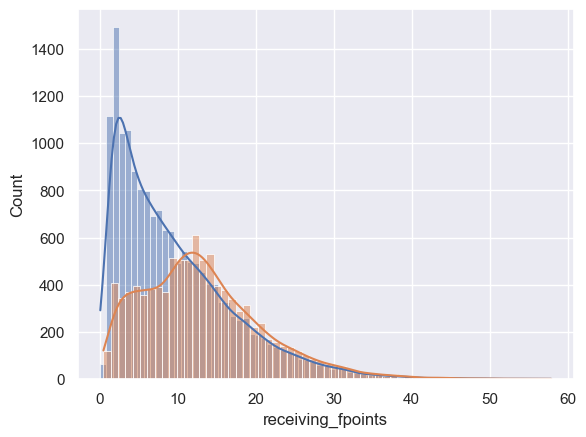

In [13]:
data_pipeline = prepare_data.PrepData()
data_pipeline.read_data()
data_pipeline.clean_data()
data_pipeline.get_top_n()
data_pipeline.window_data()
data_pipeline.add_external_stats()

In [14]:
data_pipeline._windowed_data.head()

player_id          game_id team week  season position  receiving_fpoints  \
0  00-0022044  2015_05_IND_HOU  IND    5  2015.0       WR               25.7   
1  00-0022044   2015_06_NE_IND  IND    6  2015.0       WR                6.5   
2  00-0022044   2015_07_NO_IND  IND    7  2015.0       WR                8.4   
3  00-0022044  2015_08_IND_CAR  IND    8  2015.0       WR               18.1   
4  00-0022044  2015_15_HOU_IND  IND   15  2015.0       WR                6.2   

    age  height  weight  ...  hist_qb_passing_yards hist_qb_touchdowns  \
0  39.8    75.0   229.0  ...                  282.0                1.0   
1  39.8    75.0   229.0  ...                  255.0                1.5   
2  39.8    75.0   229.0  ...                  286.0                2.5   
3  39.8    75.0   229.0  ...                  322.5                3.0   
4  39.8    75.0   229.0  ...                  210.5                1.0   

   hist_qb_interceptions  hist_qb_completion_percentage  \
0                    0.0                       0.600000   
1                    2.5                       0.556511   
2                    1.0                       0.555746   
3                    1.0                       0.522602   
4                    1.0                       0.522556   

   hist_qb_yards_per_attempt  hist_qb_td_percentage  \
0                   5.640000               0.020000   
1                   7.317772               0.043817   
2                   6.882790               0.058605   
3                   6.412146               0.059552   
4                   6.333647               0.031015   

   hist_qb_interception_percentage  hist_qb_QBR  hist_qb_num_snaps  \
0                         0.000000    82.250000                NaN   
1                         0.070844    64.037333               35.0   
2                         0.030303    83.982514               43.0   
3                         0.020833    83.520866               50.5   
4                         0.035714    67.477287               33.0   

   qb_player_id  
0    00-0007091  
1    00-0029668  
2    00-0029668  
3    00-0029668  
4    00-0007091  

[5 rows x 65 columns]

In [15]:
temp = data_pipeline._windowed_data.isna().sum()
temp[temp>0]

total_qb_fpoints_given_up      58
total_wr_fpoints_given_up      58
def_inj_starters             4631
hist_qb_num_snaps             677
dtype: int64

In [16]:
data_pipeline._windowed_data[data_pipeline._windowed_data['total_qb_fpoints_given_up'].isna()]

player_id          game_id team week  season position  \
74    00-0025389  2015_03_DEN_DET  DET    3  2015.0       WR   
88    00-0025396   2015_03_NO_CAR  CAR    3  2015.0       WR   
100   00-0025465    2015_03_KC_GB   GB    3  2015.0       WR   
124   00-0026182  2015_03_CHI_SEA  CHI    3  2015.0       WR   
125   00-0026182  2015_04_OAK_CHI  CHI    4  2015.0       WR   
274   00-0027891  2015_03_DEN_DET  DET    3  2015.0       WR   
333   00-0028002    2015_03_KC_GB   GB    3  2015.0       WR   
381   00-0028434  2015_03_CHI_SEA  SEA    3  2015.0       WR   
416   00-0029159  2015_03_CHI_SEA  SEA    3  2015.0       WR   
429   00-0029262  2015_03_WAS_NYG  NYG    3  2015.0       WR   
455   00-0029319  2015_03_CHI_SEA  CHI    3  2015.0       WR   
456   00-0029319  2015_04_OAK_CHI  CHI    4  2015.0       WR   
482   00-0029608  2015_03_IND_TEN  IND    3  2015.0       WR   
503   00-0030047  2015_04_OAK_CHI  CHI    4  2015.0       WR   
564   00-0030663   2015_03_NO_CAR   NO    3  2015.0       WR   
633   00-0031235  2015_03_WAS_NYG  NYG    3  2015.0       WR   
646   00-0031236   2015_03_NO_CAR   NO    3  2015.0       WR   
659   00-0031299  2015_03_PHI_NYJ  PHI    3  2015.0       WR   
687   00-0031339  2015_03_IND_TEN  IND    3  2015.0       WR   
816   00-0032208  2015_03_IND_TEN  IND    3  2015.0       WR   
1852  00-0027874  2017_02_DAL_DEN  DEN    2  2017.0       WR   
1984  00-0029159  2017_03_MIA_NYJ  NYJ    3  2017.0       WR   
2080  00-0030035   2017_03_TB_MIN  MIN    3  2017.0       WR   
2381  00-0031588   2017_03_TB_MIN  MIN    3  2017.0       WR   
2474  00-0032688  2017_03_MIA_NYJ  NYJ    3  2017.0       WR   
7960  00-0030035  2024_05_CAR_CHI  CAR    5  2024.0       WR   
7961  00-0030431  2024_05_BUF_HOU  HOU    5  2024.0       WR   
7966  00-0031549  2024_05_BAL_CIN  BAL    5  2024.0       WR   
7969  00-0031588  2024_05_BUF_HOU  HOU    5  2024.0       WR   
7970  00-0032128   2024_05_ARI_SF   SF    5  2024.0       WR   
7971  00-0032398   2024_05_ARI_SF  ARI    5  2024.0       WR   
7972  00-0033251   2024_05_ARI_SF  ARI    5  2024.0       WR   
7973  00-0033282  2024_05_BUF_HOU  BUF    5  2024.0       WR   
7975  00-0033555  2024_05_BUF_HOU  BUF    5  2024.0       WR   
7976  00-0033891   2024_05_ARI_SF  ARI    5  2024.0       WR   
7979  00-0034272  2024_05_BUF_HOU  BUF    5  2024.0       WR   
7987  00-0034928  2024_05_BUF_HOU  HOU    5  2024.0       WR   
7990  00-0035215  2024_05_BAL_CIN  BAL    5  2024.0       WR   
7996  00-0035500   2024_05_ARI_SF  ARI    5  2024.0       WR   
8003  00-0035719   2024_05_ARI_SF   SF    5  2024.0       WR   
8007  00-0036259   2024_05_ARI_SF   SF    5  2024.0       WR   
8010  00-0036261   2024_05_ARI_SF   SF    5  2024.0       WR   
8018  00-0036410  2024_05_BAL_CIN  CIN    5  2024.0       WR   
8019  00-0036550  2024_05_BAL_CIN  BAL    5  2024.0       WR   
8022  00-0036554  2024_05_BUF_HOU  HOU    5  2024.0       WR   
8023  00-0036630  2024_05_BAL_CIN  BAL    5  2024.0       WR   
8028  00-0036900  2024_05_BAL_CIN  CIN    5  2024.0       WR   
8042  00-0037261  2024_05_BUF_HOU  BUF    5  2024.0       WR   
8059  00-0038559   2024_05_ARI_SF  ARI    5  2024.0       WR   
8061  00-0038576  2024_05_BAL_CIN  CIN    5  2024.0       WR   
8062  00-0038618  2024_05_BUF_HOU  HOU    5  2024.0       WR   
8065  00-0038619  2024_05_BAL_CIN  CIN    5  2024.0       WR   
8070  00-0039064  2024_05_BAL_CIN  BAL    5  2024.0       WR   
8077  00-0039365   2024_05_ARI_SF   SF    5  2024.0       WR   
8079  00-0039810  2024_05_BAL_CIN  CIN    5  2024.0       WR   
8082  00-0039849   2024_05_ARI_SF  ARI    5  2024.0       WR   
8087  00-0039901  2024_05_BUF_HOU  BUF    5  2024.0       WR   
8090  00-0039916   2024_05_ARI_SF   SF    5  2024.0       WR   

      receiving_fpoints   age  height  weight  ...  hist_qb_passing_yards  \
74            15.700000  35.6    77.0   237.0  ...                  266.0   
88            13.300000  36.9    71.0   180.0  ...                  185.0   

In [22]:
data_pipeline._windowed_data['opp_team'].unique()

array(['HOU', 'NE', 'NO', 'CAR', 'MIA', 'TEN', 'ARI', 'GB', 'NYG', 'BAL',
       'ATL', 'SEA', 'CHI', 'CLE', 'CIN', 'DET', 'LAR', 'MIN', 'PIT',
       'LV', 'IND', 'WAS', 'DAL', 'TB', 'KC', 'JAX', 'PHI', 'BUF', 'DEN',
       'SF', 'LAC', 'NYJ'], dtype=object)

In [11]:
data_pipeline._windowed_data[data_pipeline._windowed_data['total_qb_fpoints_given_up'].isna()]

player_id          game_id team week  season position  \
6     00-0022044  2015_17_TEN_IND  IND   17  2015.0       WR   
10    00-0022084   2015_06_BAL_SF   SF    6  2015.0       WR   
12    00-0022084   2015_11_SF_SEA   SF   11  2015.0       WR   
21    00-0022414   2015_05_PIT_SD  LAC    5  2015.0       WR   
22    00-0022414    2015_06_SD_GB  LAC    6  2015.0       WR   
...          ...              ...  ...  ...     ...      ...   
8019  00-0039816  2024_03_CHI_IND  IND    3  2024.0       WR   
8020  00-0039890  2024_03_CHI_IND  IND    3  2024.0       WR   
8021  00-0039901  2024_03_JAX_BUF  BUF    3  2024.0       WR   
8022  00-0039901  2024_04_BUF_BAL  BUF    4  2024.0       WR   
8023  00-0039919  2024_03_CHI_IND  CHI    3  2024.0       WR   

      receiving_fpoints   age  height  weight  ...  hist_qb_attempts  \
6                  14.6  39.8    75.0   229.0  ...              42.0   
10                 15.2  40.6    73.0   220.0  ...              34.0   
12                 14.3  40.6    73.0   220.0  ...               NaN   
21                  7.8  39.7    77.0   225.0  ...              39.0   
22                 14.5  39.7    77.0   225.0  ...              45.0   
...                 ...   ...     ...     ...  ...               ...   
8019                0.0  23.5    68.0   174.0  ...               NaN   
8020                0.0  22.0    74.0   205.0  ...               NaN   
8021                0.0  21.4    76.0   215.0  ...               NaN   
8022                0.0  21.4    76.0   215.0  ...               NaN   
8023                0.0  22.3    75.0   215.0  ...               NaN   

     hist_qb_passing_yards  hist_qb_touchdowns  hist_qb_interceptions  \
6                    241.5                 2.0                    1.5   
10                   211.0                 1.0                    0.5   
12                     NaN                 NaN                    NaN   
21                   302.0                 2.5                    0.5   
22                   361.5                 3.0                    0.5   
...                    ...                 ...                    ...   
8019                   NaN                 NaN                    NaN   
8020                   NaN                 NaN                    NaN   
8021                   NaN                 NaN                    NaN   
8022                   NaN                 NaN                    NaN   
8023                   NaN                 NaN                    NaN   

      hist_qb_completion_percentage  hist_qb_yards_per_attempt  \
6                          0.528465                   5.862852   
10                         0.520488                   6.121186   
12                              NaN                        NaN   
21                         0.563816                   7.711842   
22                         0.637500                   8.125000   
...                             ...                        ...   
8019                            NaN                        NaN   
8020                            NaN                        NaN   
8021                            NaN                        NaN   
8022                            NaN                        NaN   
8023                            NaN                        NaN   

      hist_qb_td_percentage  hist_qb_interception_percentage  hist_qb_QBR  \
6                  0.048304                         0.031915    73.353939   
10                 0.027027                         0.016129    73.250872   
12                      NaN                              NaN          NaN   
21                 0.063816                         0.013158    96.990132   
22                 0.067500                         0.010000   107.395833   
...                     ...                              ...          ...   
8019                    NaN                              NaN          NaN   
8020                    NaN                              NaN          NaN   
8021      

In [ ]:
# 1. Why is there missing defensive fantasy points allowed? We should probably do the fancy week association for all stats
# 2. Why are there so many missing QB stats? Try backup filling for all of those. 

## Import Data

In [2]:
wr_stats = pd.read_csv('./data/agg_wr_final.csv')
def_points_allowed = pd.read_csv('./data/def_fpoints.csv').rename({'defteam':'team'}, axis=1)
def_injuries = pd.read_csv('./data/inj_defense.csv')
qb_stats = pd.read_csv('./data/qb_stats.csv')

C:\Users\cbrad\AppData\Local\Temp\ipykernel_23504\3346390025.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  wr_stats = pd.read_csv('./data/agg_wr_final.csv')


In [3]:
wr_stats = wr_stats[wr_stats['position']=='WR']

In [4]:
wr_stats[['player_id', 'player_name', 'game_id', 'week', 'receiving_fpoints', 'ESPN_projection']].head()

player_id       player_name          game_id  week  receiving_fpoints  \
3   00-0026237    Andre Caldwell  2015_01_BAL_DEN     1                1.1   
5   00-0026739    Jordan Norwood  2015_01_BAL_DEN     1                4.5   
6   00-0027685  Emmanuel Sanders  2015_01_BAL_DEN     1               14.5   
7   00-0027874  Demaryius Thomas  2015_01_BAL_DEN     1               13.0   
15  00-0030670     Bennie Fowler  2015_01_BAL_DEN     1                0.0   

    ESPN_projection  
3               NaN  
5               NaN  
6               NaN  
7               NaN  
15              NaN

## Clean Data

1) What are our null stats?

In [5]:
# let's drop some of these high null stats
null_stats = wr_stats.isna().sum()/wr_stats.shape[0]
null_stats[null_stats>0].sort_values(ascending=False)

ESPN_projection             0.813866
avg_cushion                 0.744016
avg_separation              0.743951
twitter_username            0.629001
receiving_drop              0.596926
receiving_broken_tackles    0.596926
receiving_rat               0.596926
receiving_int               0.596926
receiving_drop_pct          0.596926
target_share_4              0.530919
draft_round                 0.321144
draft_pick                  0.321144
draft_ovr                   0.321144
snap_percentage_4           0.320362
depth_team                  0.235078
height                      0.038165
birthdate                   0.037872
weight                      0.037872
college                     0.037872
draft_year                  0.037872
age                         0.037872
target_share_1              0.026605
snap_percentage_1           0.026377
snap_percentage_3           0.026377
snap_percentage             0.026377
target_share_2              0.026377
target_share_3              0.026377
t

Let's drop some of the highly null stats. We may be able to fill these using another data source later. I could see avg_separation, receiving_rat, age, height and weight making a difference

In [6]:
# dropping stats we don't want to fil. It would affect the infromation contained in the columns
wr_stats.drop(['avg_cushion', 
               'avg_separation', 
               'twitter_username', 
               'receiving_drop', 
               'receiving_broken_tackles',
               'receiving_rat',
               'receiving_int',
               'receiving_drop_pct',
               'draft_year',
               'draft_round',
               'draft_pick',
               'draft_ovr',
               'target_share_4',
               'snap_percentage_4'], axis=1, inplace = True)


In [7]:
# let's drop some of these high null stats
null_stats = wr_stats.isna().sum()/wr_stats.shape[0]
null_stats[null_stats>0].sort_values(ascending=False)

ESPN_projection      0.813866
depth_team           0.235078
height               0.038165
age                  0.037872
birthdate            0.037872
college              0.037872
weight               0.037872
target_share_1       0.026605
snap_percentage_1    0.026377
snap_percentage_2    0.026377
snap_percentage_3    0.026377
target_share_2       0.026377
target_share_3       0.026377
target_share         0.026377
air_yards_share      0.026377
wopr                 0.026377
snap_percentage      0.026377
dtype: float64

Now let's fill the rest of these null values

In [8]:
wr_stats[wr_stats['college'].isna()].player_name.unique()

array(['Bryan Walters', 'Kevin Norwood', 'Chris Owusu', 'Corey Fuller',
       'Marc Mariani', 'Marcus Easley', 'Frankie Hammond', 'Eric Weems',
       'Seyi Ajirotutu', 'Ricardo Lockette', 'Chris Matthews',
       'Tony Washington', 'Brenton Bersin', 'Myles White', 'B.J. Daniels',
       'Walter Powell', 'Javontee Herndon', 'Kevin Smith',
       'Andrew Turzilli', 'Jeremy Ross', 'Jonathan Krause',
       'Dezmin Lewis', 'Ben Edwards', 'Rodney Smith', 'Dobson Collins',
       'Jarrett Boykin', 'Chuck Jacobs', 'Kain Colter', 'Walt Powell',
       'Kolby Listenbee', 'Darius White', 'LaRon Byrd', 'Josh Lenz',
       'Derek Keaton', 'Quenton Bundrage', 'Darrin Peterson',
       'Kieren Duncan', 'Kyle Williams', 'Titus Davis', 'Michael Bennett',
       'Chris King', 'Antwane Grant', 'Rashaun Simonise', 'Marlon Moore',
       'Andrew Hawkins', 'Rannell Hall', 'Deon Long', 'Xavier Rush',
       'Dennis Parks', 'Ed Eagan', 'David Watford', 'Ryan Spadola',
       'Joshua Stangby', 'Andre Debose

In [9]:
# let's also fill infinities
wr_stats.replace([np.inf, -np.inf], 0, inplace=True)

# we just want to replace the team depth with the depth most often held by the player
wr_stats["depth_team"] = wr_stats.groupby(["player_id", "season"])["depth_team"].transform(
    lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x.fillna(np.nan)
)
wr_stats["target_share_1"] = wr_stats.groupby(["player_id", "season"])["target_share_1"].transform(
    lambda x: x.fillna(x.mean())
)
# the rest of these players are low on the depth chart so let's just fill with the max
wr_stats["depth_team"] = wr_stats["depth_team"].fillna(wr_stats.depth_team.max())

# for the rest of the null stats, only 18 players have this issue. Of these, none are very impactful players (from a fantasy football persepctive). We will be dropping these statlines
wr_stats.drop(wr_stats[wr_stats.college.isna()].index, inplace = True)

wr_stats['height'] = wr_stats['height'].fillna(wr_stats['height'].mean())

In [10]:
# let's check our nulls
null_stats = wr_stats.isna().sum()/wr_stats.shape[0]
null_stats[null_stats>0].sort_values(ascending=False).index.tolist()

['ESPN_projection',
 'snap_percentage_1',
 'snap_percentage_2',
 'snap_percentage_3',
 'snap_percentage',
 'target_share_1',
 'target_share_2',
 'target_share_3',
 'target_share',
 'air_yards_share',
 'wopr']

In [11]:
for c in null_stats[null_stats>0].sort_values(ascending=False).index.tolist():
    if c != 'ESPN_projection':
        wr_stats[c] = wr_stats.groupby(["player_id"])[c].transform(
                    lambda x: x.fillna(x.mean())
                )

In [12]:
# let's check our nulls
null_stats = wr_stats.isna().sum()/wr_stats.shape[0]
null_stats[null_stats>0].sort_values(ascending=False)

ESPN_projection      0.806539
snap_percentage_1    0.004298
snap_percentage_2    0.004298
snap_percentage_3    0.004298
snap_percentage      0.004298
target_share_1       0.004298
target_share_2       0.004298
target_share_3       0.004298
target_share         0.004298
air_yards_share      0.004298
wopr                 0.004298
dtype: float64

we're only going to keep the top-40 performances each week. 

<Axes: xlabel='receiving_fpoints', ylabel='Count'>

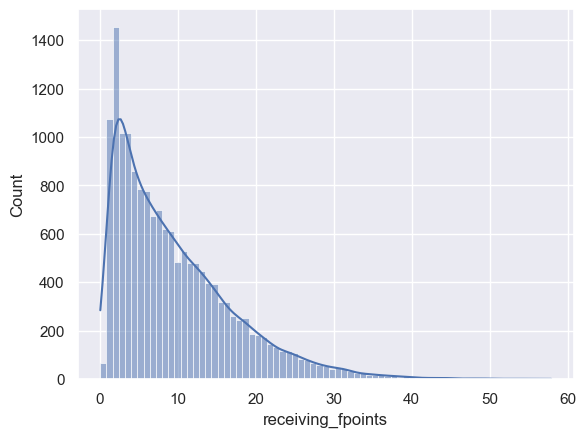

In [13]:
# should we thin out some of the lower fantasy performances?
sns.histplot(wr_stats[wr_stats['receiving_fpoints'] > 0]['receiving_fpoints'], kde=True)

In [14]:
# ADDED 6/17/2024 the last thing I want to do is just get only the top 40 performances each week, 
# first, sort by week and points
top_n = 30
roll_window = 2
wrs = wr_stats.sort_values(by = ['season', 'week', 'receiving_fpoints'], ascending = [True, True, False]).copy()
wrs = wrs.groupby(['season', 'week']).head(top_n)
wrs.shape

(4800, 52)

In [15]:
# since we are doing rolling windows, I need the previous n weeks as well
temp = pd.DataFrame(columns = wr_stats.columns)
for idx, row in wrs.iterrows():
    if row['week'] == 1:
        continue
    else:
        week = row['week']
        if week - roll_window < 1:
            final_week = 1
        else:
            final_week = week - roll_window
        for pweek in range(week-1, final_week-1, -1):
            if len(wrs[(wrs['season'] == row['season']) & \
                  (wrs['week'] == pweek) & \
                  (wrs['player_id'] == row['player_id'])]) == 0:
                   
                temp = pd.concat([temp, wr_stats[(wr_stats['season'] == row['season']) & \
                      (wr_stats['week'] == pweek) & \
                      (wr_stats['player_id'] == row['player_id'])]], 
                     ignore_index = True)
    
    # else row['week'] == 2:
    #     temp = pd.concat([temp, wr_stats[(wr_stats['season'] == row['season']) & \
    #                       (wr_stats['week'] == 1) & \
    #                       (wr_stats['player_id'] == row['player_id'])]], 
    #                      ignore_index = True)
    # else:
    #     wk = row['week']
    #     temp = pd.concat([temp, wr_stats[(wr_stats['season'] == row['season']) & \
    #                       (wr_stats['week'] == wk - 1) & \
    #                       (wr_stats['player_id'] == row['player_id'])]], 
    #                      ignore_index = True)
    #     temp = pd.concat([temp, wr_stats[(wr_stats['season'] == row['season']) & \
    #                       (wr_stats['week'] == wk - 2) & \
    #                       (wr_stats['player_id'] == row['player_id'])]], 
    #                      ignore_index = True)

wrs = pd.concat([wrs, temp], ignore_index = True).sort_values(by=['season', 'player_id', 'week']).drop_duplicates()
wrs.shape

C:\Users\cbrad\AppData\Local\Temp\ipykernel_23504\1417934023.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  temp = pd.concat([temp, wr_stats[(wr_stats['season'] == row['season']) & \


(8672, 52)

In [16]:
wrs.head()

player_id          game_id receiving_yards   avg_yac receptions  \
4884  00-0022044  2015_03_IND_TEN               0  0.000000          0   
4883  00-0022044  2015_04_JAX_IND               0  0.000000          0   
121   00-0022044  2015_05_IND_HOU              77  4.000000          6   
4977  00-0022044   2015_06_NE_IND              35  3.333333          3   
4976  00-0022044   2015_07_NO_IND              44  4.250000          4   

     receiving_touchdowns week status targets_1 targets_2  ...  \
4884                    0    3    ACT         0         1  ...   
4883                    0    4    ACT         1         1  ...   
121                     2    5    ACT         2         3  ...   
4977                    0    6    ACT         2         3  ...   
4976                    0    7    ACT         2         1  ...   

     snap_percentage target_share_1 target_share_2 target_share_3  \
4884             0.0       0.000000       0.083333       0.000000   
4883             0.0       0.066667       0.047619       0.000000   
121              0.0       0.222222       0.272727       0.125000   
4977             0.0       0.111111       0.150000       0.076923   
4976             0.0       0.095238       0.058824       0.100000   

      target_share  air_yards_share  depth_team      wopr opp_team  \
4884      0.030303         0.016779         1.0  0.057200      TEN   
4883      0.040000         0.092732         1.0  0.124912      JAX   
121       0.241379         0.239496         1.0  0.529716      HOU   
4977      0.113208         0.178495         1.0  0.294758       NE   
4976      0.083333         0.068878         1.0  0.173214       NO   

     ESPN_projection  
4884             NaN  
4883             NaN  
121              NaN  
4977             NaN  
4976             NaN  

[5 rows x 52 columns]

<Axes: xlabel='receiving_fpoints', ylabel='Count'>

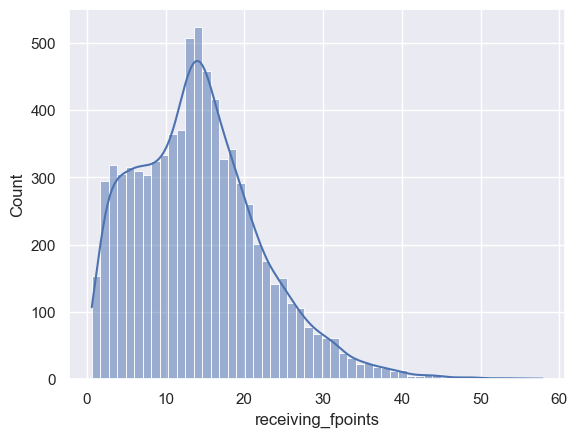

In [17]:
# this looks much better!
sns.histplot(wrs[wrs['receiving_fpoints'] > 0]['receiving_fpoints'], kde=True)

## Train, Test Split

Now that the data is clean and ready to go for ML, let's set up our testing and training data by

1. Getting windowed data so that each entry has the average of the last two weeks for features: avg yards, avg td's, etc.
2. Use SKlean to split the testing and training data

In [18]:
# now we need to get the dataset to be averages of all datapoints aside from fantasy points before the current week.
new_dataset = wrs[['player_id', 
                   'game_id', 
                   'team', 
                   'week', 
                   'season',
                   'position', 
                   'receiving_fpoints', 
                   'age', 
                   'height', 
                   'weight', 
                   'depth_team', 
                   'opp_team',
                   'ESPN_projection']]

cmas = wrs[['player_id', 'game_id', 'receiving_yards', 'avg_yac', 'receptions',
       'receiving_touchdowns', 'season', 'week', 'targets_1', 'targets_2', 'targets_3',
       'targets_4', 'total_targets', 'rz_targets', 'garbage_time_fpoints',
       'receiving_fpoints', 'avg_depth_of_target', 'air_yards',
       'max_target_depth', 'fumble_lost', 'receiving_first_downs',
       'receiving_epa', 'receiving_2pt_conversions', 'unrealized_air_yards',
       'racr', 'snap_count_1', 'snap_count_2', 'snap_count_3', 'snap_count_4',
       'total_relevant_snaps', 'snap_percentage_1',
       'snap_percentage_2', 'snap_percentage_3', 'snap_percentage',
       'target_share_1', 'target_share_2', 'target_share_3', 'target_share',
       'air_yards_share', 'wopr']].sort_values(by=['player_id', 'season', 'week'])
cmas = cmas.set_index(['week', 'game_id']).groupby(['player_id', 'season']).rolling(roll_window, min_periods=roll_window).mean().reset_index().rename({'receiving_fpoints':'past_fpoints'}, axis=1)



In [19]:
new_dataset.shape

(8672, 13)

In [20]:
# this ensures that the new_week stat associates a players historical stats with the "current" week
# NOTE: Those with a NaN new week are players who did not play past that "week"
for idx, row in new_dataset.iterrows():
    week = row.week
    pid = row.player_id
    season = row.season

    # most recent stats
    temp_week = cmas[(cmas.season == season) & (cmas.player_id == pid) & (cmas.week < week)].week.max()
    index = cmas[(cmas.season == season) & (cmas.player_id == pid) & (cmas.week == temp_week)].index
    cmas.loc[index, 'new_week'] = week

In [21]:
print(f"The length of the dataset pre-windowing is: {len(new_dataset)}")


The length of the dataset pre-windowing is: 8672


In [22]:
new_dataset.shape

(8672, 13)

In [23]:
# now we merge cma stats
data = new_dataset.merge(cmas.drop('game_id', axis=1), 
                         left_on=['player_id', 'season', 'week'], 
                         right_on=['player_id', 'season', 'new_week'], 
                         suffixes = ('', '_remove'))
data.drop([x for x in data.columns if '_remove' in x], axis=1, inplace = True)
data.dropna(subset = cmas.columns.tolist(), inplace = True)
print(f"The length of the dataset post-windowing is: {len(data)}")
data.head()

The length of the dataset post-windowing is: 6337


player_id          game_id team week  season position  receiving_fpoints  \
1  00-0022044  2015_05_IND_HOU  IND    5  2015.0       WR               25.7   
2  00-0022044   2015_06_NE_IND  IND    6  2015.0       WR                6.5   
3  00-0022044   2015_07_NO_IND  IND    7  2015.0       WR                8.4   
4  00-0022044  2015_08_IND_CAR  IND    8  2015.0       WR               18.1   
5  00-0022044  2015_15_HOU_IND  IND   15  2015.0       WR                6.2   

    age  height  weight  ...  snap_percentage_2 snap_percentage_3  \
1  39.8    75.0   229.0  ...                0.0               0.0   
2  39.8    75.0   229.0  ...                0.0               0.0   
3  39.8    75.0   229.0  ...                0.0               0.0   
4  39.8    75.0   229.0  ...                0.0               0.0   
5  39.8    75.0   229.0  ...                0.0               0.0   

   snap_percentage  target_share_1  target_share_2  target_share_3  \
1              0.0        0.033333        0.065476        0.000000   
2              0.0        0.144444        0.160173        0.062500   
3              0.0        0.166667        0.211364        0.100962   
4              0.0        0.103175        0.104412        0.088462   
5              0.0        0.100251        0.123162        0.165385   

   target_share  air_yards_share      wopr  new_week  
1      0.035152         0.054755  0.091056       5.0  
2      0.140690         0.166114  0.327314       6.0  
3      0.177293         0.208995  0.412237       7.0  
4      0.098270         0.123686  0.233986       8.0  
5      0.123299         0.156347  0.294392      15.0  

[5 rows x 50 columns]

### Adding Defensive and QB Stats

In [24]:
def_points_allowed['season'] = def_points_allowed['game_id'].apply(lambda x: int(x[:4]))
qb_stats['season'] = qb_stats['game_id'].apply(lambda x: int(x[:4]))
def_injuries['season'] = def_injuries['game_id'].apply(lambda x: int(x[:4]))

In [25]:
# now we need to merge in average QBR, Average Defensive Rating, and Current Defensive Injuries
def_points_allowed.sort_values(by=['team','season','week'], inplace=True)
qb_stats.sort_values(by=['posteam', 'passer_player_id', 'season', 'week'], inplace=True)

def_points_allowed_2 = def_points_allowed.set_index(['game_id', 'week']).groupby(['team', 'season']).rolling(roll_window, min_periods=roll_window).mean().reset_index()
qb_stats_2 = qb_stats.set_index(['game_id', 'week', 'posteam']).groupby(['passer_player_id', 'season']).rolling(roll_window, min_periods=roll_window).mean().reset_index()

# I need a QB's past stats but for the current starter. 
qb_starts = qb_stats_2[['passer_player_id', 'week', 'season', 'game_id', 'posteam']].copy()

In [26]:
# because we want to correlate the average of all past performances with the current 
def_points_allowed_2['week'] = def_points_allowed_2['week'] + 1
qb_stats_2['week'] = qb_stats_2['week'] + 1

qbr = qb_starts.merge(qb_stats_2[['passer_player_id', 'week', 'season', 'QBR']], on=['passer_player_id', 'week', 'season'])
qbr.rename({'QBR':'hist_QBR'}, axis=1, inplace=True)
qbr.head()

passer_player_id  week  season          game_id posteam   hist_QBR
0       00-0007091     5    2015  2015_05_IND_HOU     IND        NaN
1       00-0007091    12    2015   2015_12_TB_IND     IND  93.528144
2       00-0007091    13    2015  2015_13_IND_PIT     IND  86.934913
3       00-0007091    14    2015  2015_14_IND_JAX     IND  75.603505
4       00-0007091    15    2015  2015_15_HOU_IND     IND  67.477287

In [29]:
# let's just fill the QBR with the average for a player
qbr['hist_QBR'] = qbr.groupby(['passer_player_id', 'season'])['hist_QBR'].apply(lambda x: x.fillna(x.mean())).values
# finally, for any remaining, just fill with the league average
qbr_av = qbr['hist_QBR'].mean()
qbr['hist_QBR'] = qbr['hist_QBR'].fillna(qbr_av)
qbr.head()

passer_player_id  week  season          game_id posteam   hist_QBR
0       00-0007091     5    2015  2015_05_IND_HOU     IND  78.793885
1       00-0007091    12    2015   2015_12_TB_IND     IND  93.528144
2       00-0007091    13    2015  2015_13_IND_PIT     IND  86.934913
3       00-0007091    14    2015  2015_14_IND_JAX     IND  75.603505
4       00-0007091    15    2015  2015_15_HOU_IND     IND  67.477287

In [30]:
qbr.tail()

passer_player_id  week  season          game_id posteam   hist_QBR
4007       00-0039163    13    2023  2023_13_DEN_HOU     HOU  91.666667
4008       00-0039163    14    2023  2023_14_HOU_NYJ     HOU  95.883838
4009       00-0039163    18    2023  2023_18_HOU_IND     HOU  73.337542
4010       00-0039164     2    2023  2023_02_IND_HOU     IND  80.416667
4011       00-0039164     5    2023  2023_05_TEN_IND     IND  80.416667

In [31]:
# We need to only keep the starters for each week (thus, if a player got injured, we wouldn't know that ahead of time)
import nfl_data_py as nfl
dc = nfl.import_depth_charts(years=[2018, 2019, 2020, 2021, 2022, 2023, 2024])
dc.drop_duplicates(inplace=True)

starter_filter = dc[(dc['position'] == 'QB') & (dc['depth_position'] == 'QB') & (dc['depth_team'] == '1') & (dc['formation'] == 'Offense') & (dc['game_type'] == 'REG') & (dc.week > 1)].rename({'gsis_id':'passer_player_id'},axis=1)
starter_filter = starter_filter.groupby([x for x in starter_filter.columns if x != 'depth_team']).agg({'depth_team':'min'})['depth_team'].reset_index()
qbr_final = starter_filter[['passer_player_id', 'week', 'season']].merge(qbr, how='left', on = ['passer_player_id', 'week', 'season'])


In [32]:
qbr_final.dropna(subset='game_id', inplace = True)
def_points_allowed_2.dropna(subset='game_id', inplace = True)

In [33]:
# because of bye weeks we have to do this again
for idx, row in data.iterrows():
    week = row.week
    defense = row.opp_team
    offense = row.team
    season = row.season

    # most recent defensive_stats
    temp_week = def_points_allowed_2[(def_points_allowed_2.season == season) & \
                                        (def_points_allowed_2.team == defense) & \
                                        (def_points_allowed_2.week < week)].week.max()
    index = def_points_allowed_2[(def_points_allowed_2.season == season) & \
                                    (def_points_allowed_2.team == defense) & \
                                    (def_points_allowed_2.week == temp_week)].index
    def_points_allowed_2.loc[index, 'new_week'] = week

    # most recent qb stats
    temp_week = qbr_final[(qbr_final.season == season) & \
                                        (qbr_final.posteam == offense) & \
                                        (qbr_final.week < week)].week.max()
    index = qbr_final[(qbr_final.season == season) & \
                                    (qbr_final.posteam == defense) & \
                                    (qbr_final.week == temp_week)].index
    qbr_final.loc[index, 'new_week'] = week

In [34]:

data2 = data.merge(def_points_allowed_2.drop(['game_id'], axis=1), 
                    how = 'left', 
                    left_on=['opp_team', 'week', 'season'],
                    right_on=['team', 'week', 'season'], 
                    suffixes=('', '_remove'))
data2.drop([i for i in data2.columns if 'remove' in i],
               axis=1, inplace=True)
data3 = data2.merge(def_injuries.drop(['game_id'], axis=1), 
                    how = 'left', 
                    left_on=['opp_team', 'week', 'season'], 
                    right_on=['team', 'week', 'season'], 
                    suffixes=('', '_remove')) \
        .rename({'num_injured_starters': 'def_inj_starters'}, axis = 1)

# now we can get QB stats
data4 = data3.merge(qbr_final.drop(['game_id'], axis=1),
                    how = 'left', 
                    left_on=['team', 'week', 'season'], 
                    right_on=['posteam', 'week', 'season'], 
                    suffixes=('', '_remove')) \
        .drop(['passer_player_id', 'posteam'], axis = 1)

# del data, data2
# defensive stats
data4.sort_values(['season', 'week', 'team']).tail()

player_id         game_id team week  season position  \
6315  00-0036407  2024_04_CLE_LV  CLE    4  2024.0       WR   
6323  00-0036980  2024_04_CLE_LV  CLE    4  2024.0       WR   
6289  00-0031381  2024_04_CLE_LV   LV    4  2024.0       WR   
6304  00-0034960  2024_04_CLE_LV   LV    4  2024.0       WR   
6317  00-0036527  2024_04_CLE_LV   LV    4  2024.0       WR   

      receiving_fpoints   age  height  weight  ...      wopr new_week  \
6315                0.0  25.4    73.0   195.0  ...  0.417355      4.0   
6323                0.0  24.5    70.0   180.0  ...  0.316002      4.0   
6289                0.0  31.8    73.0   215.0  ...  0.600125      4.0   
6304                0.0  27.9    74.0   200.0  ...  0.424199      4.0   
6317                0.0  27.7    69.0   205.0  ...  0.002780      4.0   

      total_qb_fpoints_given_up  total_rb_fpoints_given_up  \
6315                        NaN                        NaN   
6323                        NaN                        NaN   
6289                        NaN                        NaN   
6304                        NaN                        NaN   
6317                        NaN                        NaN   

      total_wr_fpoints_given_up  total_te_fpoints_given_up  team_remove  \
6315                        NaN                        NaN          NaN   
6323                        NaN                        NaN          NaN   
6289                        NaN                        NaN          NaN   
6304                        NaN                        NaN          NaN   
6317                        NaN                        NaN          NaN   

      def_inj_starters  hist_QBR  new_week_remove  
6315               NaN       NaN              NaN  
6323               NaN       NaN              NaN  
6289               NaN       NaN              NaN  
6304               NaN       NaN              NaN  
6317               NaN       NaN              NaN  

[5 rows x 58 columns]

In [35]:
data4.drop([x for x in data4.columns if '_remove' in x], axis=1, inplace = True)
print(f"The length of the dataset post-windowing is: {len(data4)}")
# let's drop some of these high null stats
null_stats = data4.isna().sum()/data4.shape[0]
null_stats[null_stats>0].sort_values(ascending=False)

The length of the dataset post-windowing is: 6337


def_inj_starters             0.570459
ESPN_projection              0.510652
hist_QBR                     0.454474
total_te_fpoints_given_up    0.113934
total_qb_fpoints_given_up    0.099101
total_rb_fpoints_given_up    0.099101
total_wr_fpoints_given_up    0.099101
dtype: float64

In [30]:
# let's assume injured defenders is 0 when it's null
data4['def_inj_starters'] = data4['def_inj_starters'].fillna(0)

# as for the other stats, let's just fill the average
# print(f"Average QB fantasy points given up across 2023: {data4['total_qb_fpoints_given_up'].mean()}")
# data4['total_qb_fpoints_given_up'] = data4['total_qb_fpoints_given_up'].fillna(data4['total_qb_fpoints_given_up'].mean())
# print(f"Average RB fantasy points given up across 2023: {data4['total_rb_fpoints_given_up'].mean()}")
# data4['total_rb_fpoints_given_up'] = data4['total_rb_fpoints_given_up'].fillna(data4['total_rb_fpoints_given_up'].mean())
# print(f"Average WR fantasy points given up across 2023: {data4['total_wr_fpoints_given_up'].mean()}")
# data4['total_wr_fpoints_given_up'] = data4['total_wr_fpoints_given_up'].fillna(data4['total_wr_fpoints_given_up'].mean())
print(f"Average TE fantasy points given up across 2023: {data4['total_te_fpoints_given_up'].mean()}")
data4['total_te_fpoints_given_up'] = data4['total_te_fpoints_given_up'].fillna(data4['total_te_fpoints_given_up'].mean())
# finally fill QBR
print(f"Average QBR across 2018-2023: {data4['hist_QBR'].mean()}")
data4['hist_QBR'] = data4['hist_QBR'].fillna(data4['hist_QBR'].mean())

Average TE fantasy points given up across 2023: 12.317612405984494
Average QBR across 2018-2023: 90.66303244671663


### split up testing and training data

In [31]:

data4["week"] = data4.apply(lambda x: x["week"] / 18 if x["season"] >=2021 else x["week"]/17, axis=1)

data4["depth_team"] = data4["depth_team"] / 3
drop_list = ['receiving_fpoints', 
             'ESPN_projection',
             'new_week',
             'player_id', 
             'game_id', 
             'team', 
             'opp_team', 
             'position', 
             'total_te_fpoints_given_up', 
             'total_qb_fpoints_given_up', 
             'total_rb_fpoints_given_up',
             'original_index']
data4 = data4.reset_index().rename({'index':'original_index'}, axis=1)


In [32]:
rand_split = False

if rand_split:
    X_train, X_test, y_train,y_test = train_test_split(data4.drop(drop_list, axis=1), 
                                                                            data4['receiving_fpoints'], 
                                                                            test_size = 0.33, 
                                                                            random_state = 42)
else:
    train_df = data4[data4["season"] < 2023].copy()
    test_df = data4[data4["season"] == 2023].copy()

    X_train = train_df.drop(drop_list, axis=1)
    X_test = test_df.drop(drop_list, axis=1)

    y_train = train_df["receiving_fpoints"]
    y_test = test_df["receiving_fpoints"]

# scaling
non_scale_list = [
                    "week",
                    "depth_team",
                    "snap_percentage_1",
                    "snap_percentage_2",
                    "snap_percentage_3",
                    "target_share",
                    "air_yards_share",
                    "target_share_1",
                    "target_share_2",
                    "target_share_3",
                    "target_share_1",
                    "wopr",
                    "def_inj_starters"
                ]
# columns you don't need to scale:
scale_list = [
    x
    for x in data4.columns
    if x
    not in non_scale_list + drop_list
]


feature_list = scale_list + non_scale_list

# scale train data
X_train_2 = X_train[scale_list]
leftover_train = np.asarray(
            X_train[non_scale_list]
        )
y_train_s = np.asarray(y_train)

train_scaler = StandardScaler()
X_train_s = train_scaler.fit_transform(X=X_train_2)
X_train_s_all = np.concatenate((X_train_s, leftover_train), axis=1)

# scale test data
X_test_2 = X_test[scale_list]
leftover_test = np.asarray(
            X_test[non_scale_list]
        )
y_test_s = np.asarray(y_test)

test_scaler = StandardScaler()
X_test_s = test_scaler.fit_transform(X=X_test_2)
X_test_s_all = np.concatenate((X_test_s, leftover_test), axis=1)

print(f"shape1 {X_train_s.shape}, shape2: {X_train_s_all.shape}")

shape1 (5569, 33), shape2: (5569, 46)


## Let's do some machine learning

In [41]:
# let's train a simple regression model to see how we do
reg = LinearRegression()
cross_val_score(reg, X_train_s_all, y_train_s, scoring='neg_mean_absolute_error', cv=3)

array([-5.88107208, -6.05254084, -5.87749763])

In [42]:
reg.fit(X_train_s_all, y_train_s)
y_pred_reg = reg.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(np.asarray(y_test), y_pred_reg)}")

MAE: 3083711651442.9043


In [43]:
def get_test_results(test_target, preds, id_map, init_data):
    results = pd.DataFrame(test_target)
    results['yhat'] = preds
    results = results.merge(id_map, how = 'left', left_index = True, right_index = True)
    results = results.merge(init_data, how = 'left', on=['player_id', 'game_id'])
    return results


In [44]:
reg1_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred_reg,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']])
reg1_test_results.head()

receiving_fpoints          yhat   player_id          game_id   player_name  \
0               17.4  5.444685e+12  00-0027944  2023_17_ARI_PHI   Julio Jones   
1               31.5 -3.444306e+12  00-0030035  2023_03_CAR_SEA  Adam Thielen   
2               14.6 -6.292791e+12  00-0030035  2023_04_MIN_CAR  Adam Thielen   
3               27.7 -9.267851e+12  00-0030035  2023_05_CAR_DET  Adam Thielen   
4               28.5 -5.069377e+12  00-0030035  2023_06_CAR_MIA  Adam Thielen   

   receiving_yards  receptions  receiving_touchdowns week  fumble_lost  \
0             34.0         2.0                   2.0   17          0.0   
1            145.0        11.0                   1.0    3          0.0   
2             76.0         7.0                   0.0    4          0.0   
3            107.0        11.0                   1.0    5          0.0   
4            115.0        11.0                   1.0    6          0.0   

   ESPN_projection  
0              NaN  
1         9.703639  
2        13.125377  
3        14.109426  
4        15.753747

In [45]:
# how did ESPN do?
y_espn = np.asarray(reg1_test_results[~reg1_test_results['ESPN_projection'].isna()]['receiving_fpoints'])
yhat_espn = np.asarray(reg1_test_results[~reg1_test_results['ESPN_projection'].isna()]['ESPN_projection'])
perc_filled_espn = reg1_test_results[~reg1_test_results['ESPN_projection'].isna()].shape[0]/reg1_test_results.shape[0]
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. ESPN projections are {perc_filled_espn:.2%} of records.")

ESPN MAE: 6.420987544124975. ESPN projections are 81.79% of records.


In [46]:
# maybe we have a dimensionality problem. Let's just grab some predictive features
# high variance also probably means we don't have enough data
feature_idx_list = (feature_list.index('past_fpoints'), feature_list.index('receiving_first_downs'), feature_list.index('wopr'), feature_list.index('racr'))
X_train_sub = X_train_s_all[:, feature_idx_list]
cross_val_score(reg, X_train_sub, y_train_s, scoring='neg_mean_absolute_error', cv=3)

array([-6.41311452, -6.49648731, -6.40863752])

In [47]:
# that's a little better
reg.fit(X_train_sub, y_train_s)
X_test_sub = X_test_s_all[:, feature_idx_list]
y_pred_reg = reg.predict(X_test_sub)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_reg)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. ESPN projections are {perc_filled_espn:.2%} of records.")

MAE: 6.3769453660099895
ESPN MAE: 6.420987544124975. ESPN projections are 81.79% of records.


In [48]:
reg2_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred_reg,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']])
reg2_test_results.head()

receiving_fpoints       yhat   player_id          game_id   player_name  \
0               17.4  14.027574  00-0027944  2023_17_ARI_PHI   Julio Jones   
1               31.5  13.885115  00-0030035  2023_03_CAR_SEA  Adam Thielen   
2               14.6  14.201290  00-0030035  2023_04_MIN_CAR  Adam Thielen   
3               27.7  14.919021  00-0030035  2023_05_CAR_DET  Adam Thielen   
4               28.5  15.215142  00-0030035  2023_06_CAR_MIA  Adam Thielen   

   receiving_yards  receptions  receiving_touchdowns week  fumble_lost  \
0             34.0         2.0                   2.0   17          0.0   
1            145.0        11.0                   1.0    3          0.0   
2             76.0         7.0                   0.0    4          0.0   
3            107.0        11.0                   1.0    5          0.0   
4            115.0        11.0                   1.0    6          0.0   

   ESPN_projection  
0              NaN  
1         9.703639  
2        13.125377  
3        14.109426  
4        15.753747

In [49]:
# we could look at random forest as well
rf = RandomForestRegressor(max_depth=4, n_jobs = -1, random_state = 42)
cross_val_score(reg, X_train_s_all, y_train_s, scoring='neg_mean_absolute_error', cv=3)

array([-5.88107208, -6.05254084, -5.87749763])

In [50]:
rf.fit(X_train_s_all, y_train_s)

# get predictions
y_pred = rf.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. ESPN projections are {perc_filled_espn:.2%} of records.")

MAE: 5.941920108239412
ESPN MAE: 6.420987544124975. ESPN projections are 81.79% of records.


In [51]:
rf_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']])
rf_test_results.head()

receiving_fpoints       yhat   player_id          game_id   player_name  \
0               17.4  14.608110  00-0027944  2023_17_ARI_PHI   Julio Jones   
1               31.5  17.745180  00-0030035  2023_03_CAR_SEA  Adam Thielen   
2               14.6  21.260050  00-0030035  2023_04_MIN_CAR  Adam Thielen   
3               27.7  18.896166  00-0030035  2023_05_CAR_DET  Adam Thielen   
4               28.5  13.541960  00-0030035  2023_06_CAR_MIA  Adam Thielen   

   receiving_yards  receptions  receiving_touchdowns week  fumble_lost  \
0             34.0         2.0                   2.0   17          0.0   
1            145.0        11.0                   1.0    3          0.0   
2             76.0         7.0                   0.0    4          0.0   
3            107.0        11.0                   1.0    5          0.0   
4            115.0        11.0                   1.0    6          0.0   

   ESPN_projection  
0              NaN  
1         9.703639  
2        13.125377  
3        14.109426  
4        15.753747

Text(0.5, 0, 'Mean decrease in impurity')

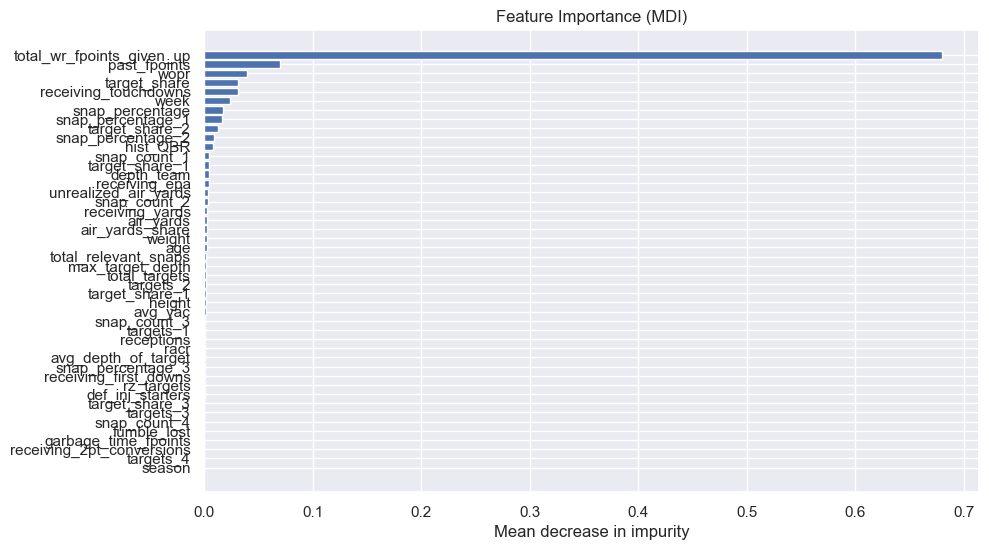

In [52]:
# obtain feature importance
feature_importance = rf.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
fig,ax = plt.subplots(figsize=(10,6))

ax.barh(pos, feature_importance[sorted_idx], align="center")

ax.set_yticks(pos, np.array(feature_list)[sorted_idx])
ax.set_title("Feature Importance (MDI)")
ax.set_xlabel("Mean decrease in impurity")

In [53]:
# finally, let's look at XGBoost
xgb = XGBRegressor(max_depth=4, n_jobs = -1, random_state = 42)
cross_val_score(reg, X_train_s_all, y_train_s, scoring='neg_mean_absolute_error', cv=3)

array([-5.88107208, -6.05254084, -5.87749763])

In [54]:
xgb.fit(X_train_s_all, y_train_s)

# get predictions
y_pred = xgb.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. ESPN projections are {perc_filled_espn:.2%} of records.")

MAE: 6.226255137591527
ESPN MAE: 6.420987544124975. ESPN projections are 81.79% of records.


In [55]:
xgb_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']])
xgb_test_results.sort_values(by=['yhat', 'player_id'], ascending = [False, False]).head()

receiving_fpoints       yhat   player_id          game_id  \
421               32.1  39.925945  00-0036358  2023_10_NYG_DAL   
429               34.8  29.772135  00-0036358  2023_18_DAL_WAS   
379               19.9  28.816376  00-0036252  2023_06_IND_JAX   
468               26.0  28.345364  00-0036900   2023_08_CIN_SF   
376               16.7  27.260666  00-0036252  2023_03_IND_BAL   

         player_name  receiving_yards  receptions  receiving_touchdowns week  \
421      CeeDee Lamb            151.0        11.0                   1.0   10   
429      CeeDee Lamb             98.0        13.0                   2.0   18   
379  Michael Pittman            109.0         9.0                   0.0    6   
468    Ja'Marr Chase            100.0        10.0                   1.0    8   
376  Michael Pittman             77.0         9.0                   0.0    3   

     fumble_lost  ESPN_projection  
421          0.0        18.529302  
429          0.0        22.776278  
379          0.0        14.679639  
468          0.0        21.901092  
376          0.0        15.586669

### Commentary

These models all perform very similarly. XGBoost is generally considered to be the best ML method in this genre, so we should definitely keep it as a contender. Let's check the baseline on all of these models and see where we land. From there, we can pick 2 or 3 and optimize hyperparameters to see where we can get. The hyperparameters to optimize are:

1. $n_p$ - The number of top performing players we keep in our training set.
2. $t_w$ - The number of days we take the average of for the training set (i.e. we take the average of the past two days fantasy points, recieving yards, etc.)
3. $\{f_i\}$ - The set of features we use to train the model: $f_0, f_1, f_2, ..., f_m$
4. Any model specific parameters.

### Some things we need to do:

1. Let's first grab some expert predictions in order to properly assess our model. Build out in Data Pull program DONE
2. Weather data. Build out in Data Pull program

## Baseline Model

Let's establish a baseline model that predicts last weeks performance as this weeks performace. In the 
case where there is no performance last week, the model will (for now) just grab the global average. 

In [56]:
# first let's establish a baseline model
def baseline_model(y, id_map, init_data):
    # grab results datafrmae
    results = pd.DataFrame(y)
    results = results.merge(id_map, how = 'left', left_index = True, right_index = True)
    results = results.merge(init_data.drop('receiving_fpoints',axis=1), how = 'left', on=['player_id', 'game_id'])
    
    prev_data = init_data[['player_id', 'week', 'season', 'receiving_fpoints']].copy().rename({'receiving_fpoints':'yhat'},axis=1)
    prev_data['week'] = prev_data['week'] + 1

    results = results.merge(prev_data, how='left', on=['player_id', 'week', 'season'])
    # if there was no data for the previous week, just predict the average. 
    # NOTE: This is probably bad practice since I am feeding information about the test set to the model, 
    # but there's no learning happening hear so I'm not worried about fitting issues.
    results['yhat'] = results['yhat'].fillna(init_data['receiving_fpoints'].mean())
    return results[['season',
                    'week',
                    'game_id', 
                    'player_id', 
                    'player_name',
                   'receiving_fpoints',
                    'yhat',
                    'ESPN_projection',
                    'receiving_yards', 
                     'receptions', 
                     'receiving_touchdowns',
                    'fumble_lost']]

baseline_test_results = baseline_model(y = y_test, 
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                      'season',
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection',
                                                     'receiving_fpoints']])

In [57]:
baseline_test_results.head()

season week          game_id   player_id   player_name  receiving_fpoints  \
0  2023.0   17  2023_17_ARI_PHI  00-0027944   Julio Jones               17.4   
1  2023.0    3  2023_03_CAR_SEA  00-0030035  Adam Thielen               31.5   
2  2023.0    4  2023_04_MIN_CAR  00-0030035  Adam Thielen               14.6   
3  2023.0    5  2023_05_CAR_DET  00-0030035  Adam Thielen               27.7   
4  2023.0    6  2023_06_CAR_MIA  00-0030035  Adam Thielen               28.5   

   yhat  ESPN_projection  receiving_yards  receptions  receiving_touchdowns  \
0   1.5              NaN             34.0         2.0                   2.0   
1  18.4         9.703639            145.0        11.0                   1.0   
2  31.5        13.125377             76.0         7.0                   0.0   
3  14.6        14.109426            107.0        11.0                   1.0   
4  27.7        15.753747            115.0        11.0                   1.0   

   fumble_lost  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [58]:
# get predictions
print(f"MAE: {mean_absolute_error(baseline_test_results['receiving_fpoints'], baseline_test_results['yhat'])}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. ESPN projections are {perc_filled_espn:.2%} of records.")

MAE: 8.967944143740603
ESPN MAE: 6.420987544124975. ESPN projections are 81.79% of records.


## Tuning XGBoost

Let's get the optimal XGBoost model.

In [59]:
# let's quickly see how good we can get XGBoost to predict
from xgboost import DMatrix, cv
import matplotlib.pyplot as plt

def modelfit(model, X, y, X_test, y_test, cols, useTrainCV=True, cv_folds=5, early_stopping_rounds=100, plot = False):

    cvresult = None
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = DMatrix(X, label=y)
        cvresult = cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mae', early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cvresult.shape[0])
        print(f"n_estimators: {cvresult.shape[0]}")
    
    #Fit the algorithm on the data
    evalset = [(X, y), (X_test, y_test)]
    _ = model.fit(X, y, eval_set = evalset, verbose=False)
        
    #Predict training set:
    predictions = model.predict(X)
    # dtrain_predprob = alg.predict_proba(y)[:,1]
        
    #Print model report:
    print("\nModel Report\n-------- TRAIN --------")
    print("MAE : %.4g" % mean_absolute_error(y, predictions))
    print("R2: %f" % r2_score(y, predictions))

    #Predict training set:
    predictions_test = model.predict(X_test)
    # dtrain_predprob = alg.predict_proba(y)[:,1]
    
    print("\nModel Report\n-------- TEST --------")
    print("MAE : %.4g" % mean_absolute_error(y_test, predictions_test))
    print("R2: %f" % r2_score(y_test, predictions_test))   

    if plot:
        fix, ax = plt.subplots(2,1,figsize = (10,10))
        
        feat_imp = pd.DataFrame(list(zip(cols, model.feature_importances_)), columns = ['Feature', 'Score']) \
            .sort_values(by='Score', ascending=True) \
            .set_index('Feature')
        feat_imp.plot(title='Feature Importances', ax = ax[0], kind='barh')
        ax[0].set_xlabel('Feature Importance Score')

        results = model.evals_result()
        # plot learning curves
        ax[1].plot(results['validation_0']['mean_absolute_error'], label='train')
        ax[1].plot(results['validation_1']['mean_absolute_error'], label='test')
        # show the legend
        ax[1].set_ylabel('Mean Absolute Error')
        ax[1].set_xlabel('Epoch')
        ax[1].legend()

    return model, cvresult


n_estimators: 43

Model Report
-------- TRAIN --------
MAE : 4.957
R2: 0.415271

Model Report
-------- TEST --------
MAE : 5.856
R2: 0.221619


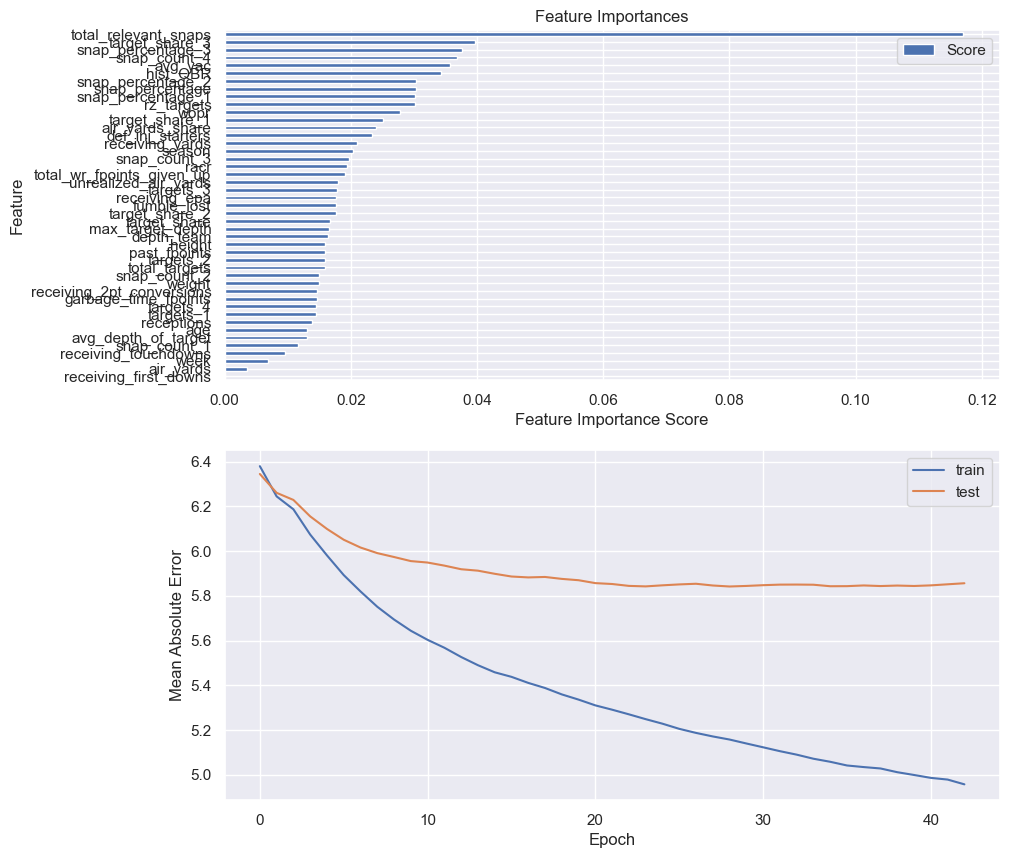

In [60]:
xgb = XGBRegressor(
    n_estimators = 1_000,
    max_depth = 5,
    max_leaves = 0,
    n_jobs = -1,
    eval_metric=mean_absolute_error,
    subsample = 0.8,
    gamma = 0,
    colsample_bytree = 0.8,
    learning_rate = 0.1,
    min_child_weight = 1
)

xgb, cv_results = modelfit(model = xgb, 
                           X = X_train_s_all, 
                           y = y_train_s, 
                           X_test = X_test_s_all, 
                           y_test = y_test_s, 
                           cols = X_train.columns.tolist(),
                           plot = True)

In [61]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
xgb = XGBRegressor(learning_rate = 0.1, 
                     n_estimators = 33,  
                     gamma = 0, 
                     subsample = 0.8, 
                     colsample_bytree = 0.8,
                     eval_metric = mean_absolute_error,
                     n_jobs = -1, 
                     seed = 27)

gsearch1 = GridSearchCV(estimator = xgb,
                        param_grid = param_test1, 
                        scoring = 'neg_mean_absolute_error',
                        cv = 3)

gsearch1.fit(X_train_s_all,y_train_s)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric=<function mean_absolute_error at 0x0000018AFFBE1080>,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interact...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=33,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_mean_absolute_error')

{'max_depth': 5, 'min_child_weight': 1}
-5.704380268214634
n_estimators: 33

Model Report
-------- TRAIN --------
MAE : 5.076
R2: 0.386621

Model Report
-------- TEST --------
MAE : 5.931
R2: 0.207582


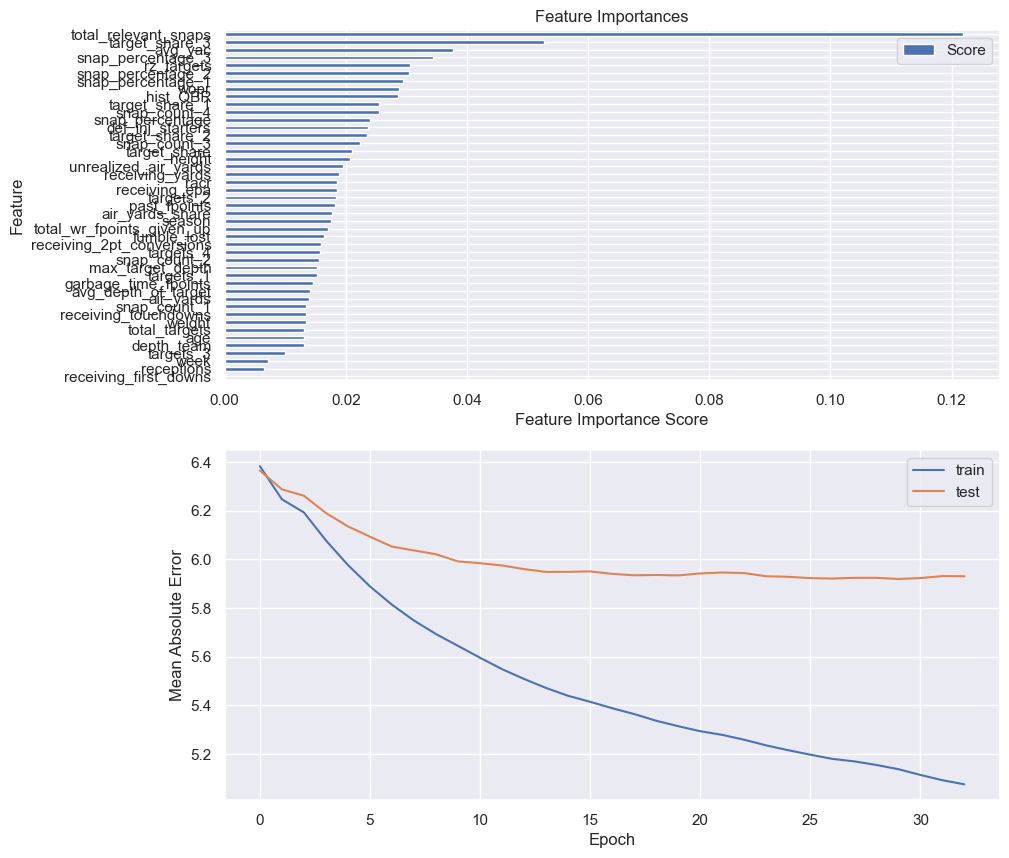

In [62]:
print(gsearch1.best_params_)
print(gsearch1.best_score_)

_, _ = modelfit(model = gsearch1.best_estimator_, 
                           X = X_train_s_all, 
                           y = y_train_s, 
                           X_test = X_test_s_all, 
                           y_test = y_test_s, 
                           cols = X_train.columns.tolist(),
                           plot = True)

In [63]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

xgb = XGBRegressor(learning_rate = 0.1, 
                     n_estimators = 33, 
                     subsample = 0.8, 
                     max_depth = 3,
                     min_child_weight = 3,
                     colsample_bytree = 0.8,
                     eval_metric = mean_absolute_error,
                     n_jobs = -1, 
                     seed = 27)

gsearch2 = GridSearchCV(estimator = xgb,
                        param_grid = param_test2, 
                        scoring = 'neg_mean_absolute_error',
                        cv = 3)

gsearch2.fit(X_train_s_all,y_train_s)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric=<function mean_absolute_error at 0x0000018AFFBE1080>,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=3, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=33,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='neg_mean_absolute_error')

{'gamma': 0.0}
-5.708904819823446
n_estimators: 33

Model Report
-------- TRAIN --------
MAE : 5.515
R2: 0.269366

Model Report
-------- TEST --------
MAE : 5.85
R2: 0.219364


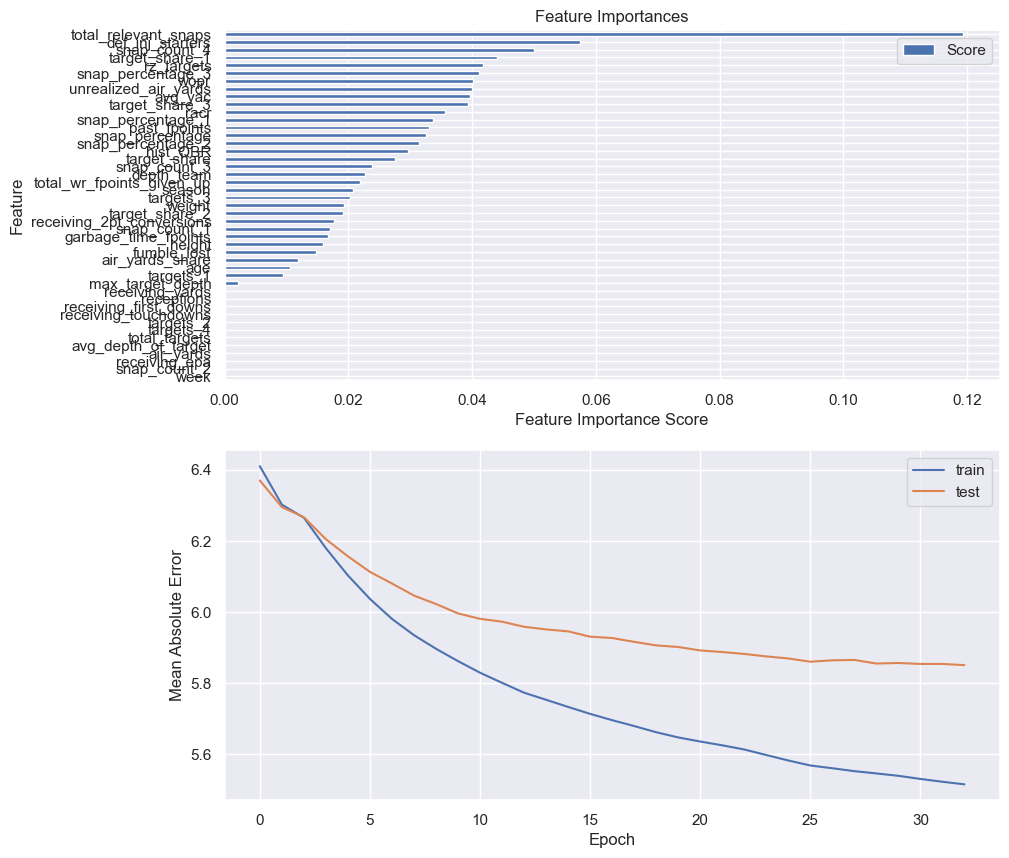

In [64]:
print(gsearch2.best_params_)
print(gsearch2.best_score_)

_, _ = modelfit(model = gsearch2.best_estimator_, 
                           X = X_train_s_all, 
                           y = y_train_s, 
                           X_test = X_test_s_all, 
                           y_test = y_test_s, 
                           cols = X_train.columns.tolist(),
                           plot = True)

In [65]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb = XGBRegressor(learning_rate = 0.1, 
                     n_estimators = 33, 
                     subsample = 0.8, 
                     max_depth = 3,
                     gamma = 0,
                     min_child_weight = 3,
                     colsample_bytree = 0.8,
                     eval_metric = mean_absolute_error,
                     n_jobs = -1, 
                     seed = 27)

gsearch3 = GridSearchCV(estimator = xgb,
                        param_grid = param_test4, 
                        scoring = 'neg_mean_absolute_error',
                        cv = 3)

gsearch3.fit(X_train_s_all,y_train_s)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric=<function mean_absolute_error at 0x0000018AFFBE1080>,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interact...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=3, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=33,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_absolute_error')

{'colsample_bytree': 0.8, 'subsample': 0.6}
-5.693682003913913
n_estimators: 33

Model Report
-------- TRAIN --------
MAE : 5.523
R2: 0.269538

Model Report
-------- TEST --------
MAE : 5.818
R2: 0.222833


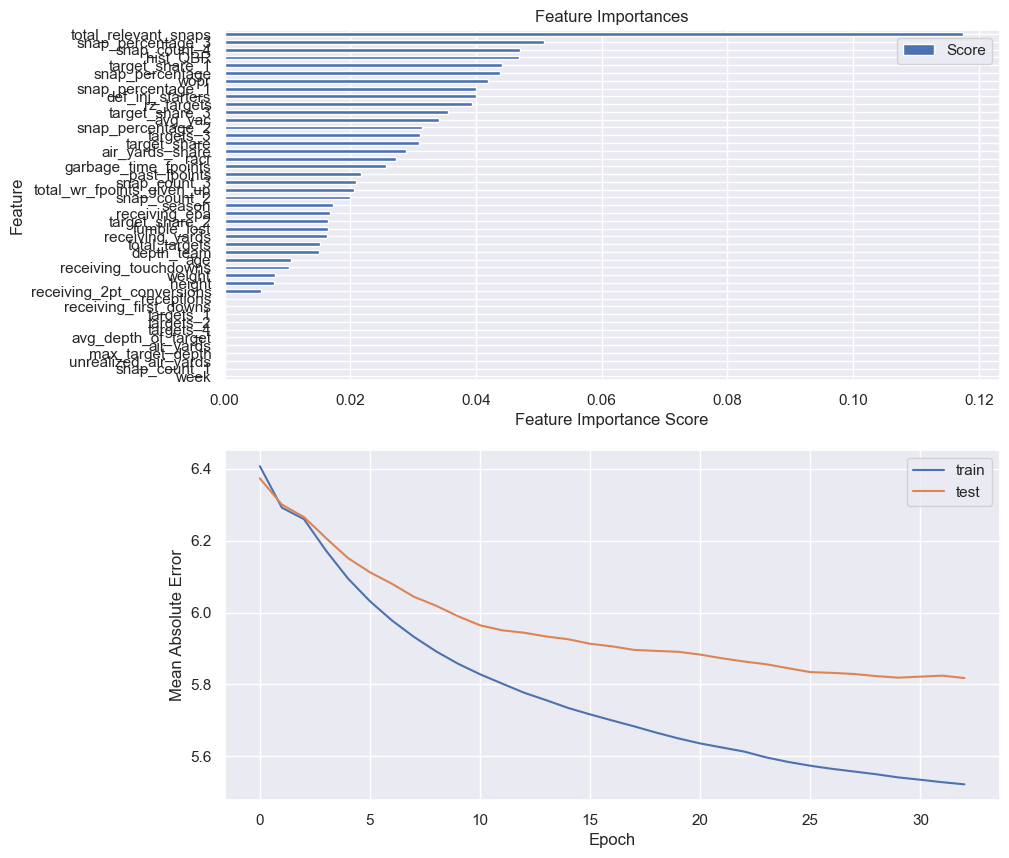

In [66]:
print(gsearch3.best_params_)
print(gsearch3.best_score_)

_, _ = modelfit(model = gsearch3.best_estimator_, 
                           X = X_train_s_all, 
                           y = y_train_s, 
                           X_test = X_test_s_all, 
                           y_test = y_test_s, 
                           cols = X_train.columns.tolist(),
                           plot = True)

n_estimators: 1083

Model Report
-------- TRAIN --------
MAE : 5.169
R2: 0.364823

Model Report
-------- TEST --------
MAE : 5.833
R2: 0.234787


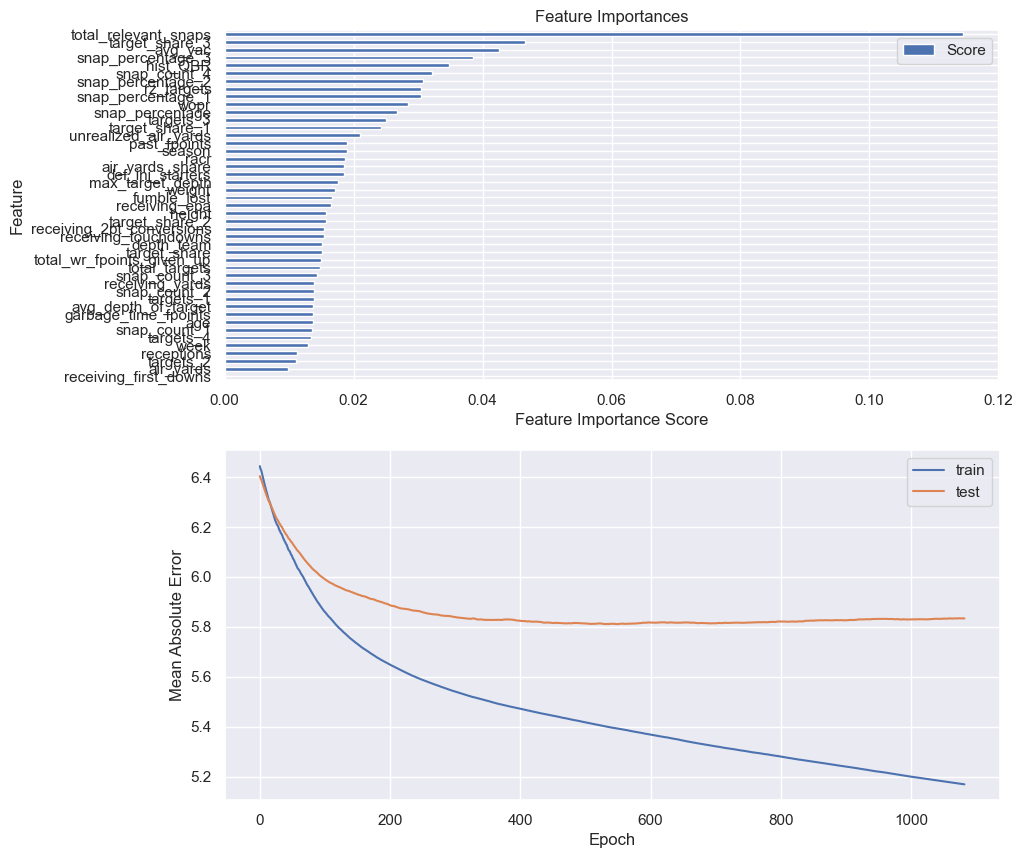

In [67]:
xgb = XGBRegressor(learning_rate = 0.01, 
                     n_estimators = 2000, 
                     subsample = 0.8, 
                     max_depth = 3,
                     gamma = 0,
                     min_child_weight = 3,
                     colsample_bytree = 0.8,
                     eval_metric = mean_absolute_error,
                     n_jobs = -1,
                     reg_lambda = 1,
                     seed = 27)

xgb, cv_results = modelfit(model = xgb, 
                           X = X_train_s_all, 
                           y = y_train_s, 
                           X_test = X_test_s_all, 
                           y_test = y_test_s, 
                           cols = X_train.columns.tolist(),
                           plot = True)

In [68]:
# get predictions
y_pred = xgb.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. ESPN projections are {perc_filled_espn:.2%} of records.")

MAE: 5.833453674069767
ESPN MAE: 6.420987544124975. ESPN projections are 81.79% of records.


In [69]:
xgb_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']])
xgb_test_results.sort_values(by=['yhat', 'player_id'], ascending = [False, False]).head()

receiving_fpoints       yhat   player_id          game_id   player_name  \
421          32.100000  35.693497  00-0036358  2023_10_NYG_DAL   CeeDee Lamb   
420          28.100001  26.937490  00-0036358  2023_09_DAL_PHI   CeeDee Lamb   
14           39.500001  26.792238  00-0030279  2023_03_LAC_MIN  Keenan Allen   
704           6.600000  26.304422  00-0039075   2023_06_ARI_LA    Puka Nacua   
447          14.400000  25.734461  00-0036554   2023_09_TB_HOU  Nico Collins   

     receiving_yards  receptions  receiving_touchdowns week  fumble_lost  \
421            151.0        11.0                   1.0   10          0.0   
420            191.0        11.0                   0.0    9          1.0   
14             215.0        18.0                   0.0    3          0.0   
704             26.0         4.0                   0.0    6          0.0   
447             54.0         3.0                   1.0    9          0.0   

     ESPN_projection  
421        18.529302  
420        18.966567  
14         16.249075  
704        15.510774  
447        14.215540

<Axes: xlabel='yhat', ylabel='Count'>

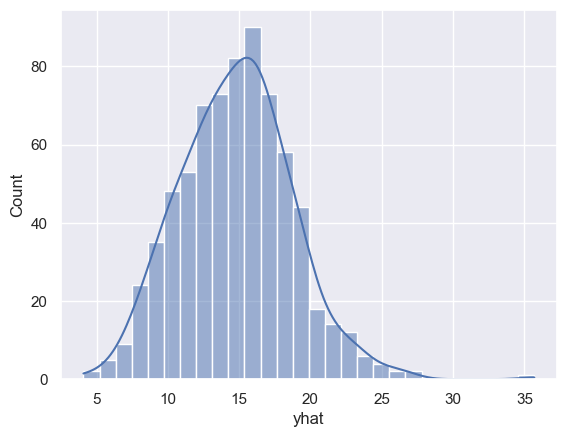

In [70]:
sns.histplot(xgb_test_results[xgb_test_results['yhat'] > 0]['yhat'], kde=True)

## Tuning Regression

That's still not better than our regression model! Let's see how well we can get regression to run.

In [71]:
# let's quickly get a baseline
reg = LinearRegression()
cross_val_score(reg, X_train_s_all, y_train_s, scoring='neg_mean_absolute_error', cv=3)

array([-5.88107208, -6.05254084, -5.87749763])

In [72]:
# get testing scores
reg.fit(X_train_s_all, y_train_s)
y_pred_reg = reg.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_reg)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 3083711651442.9043
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


<Axes: >

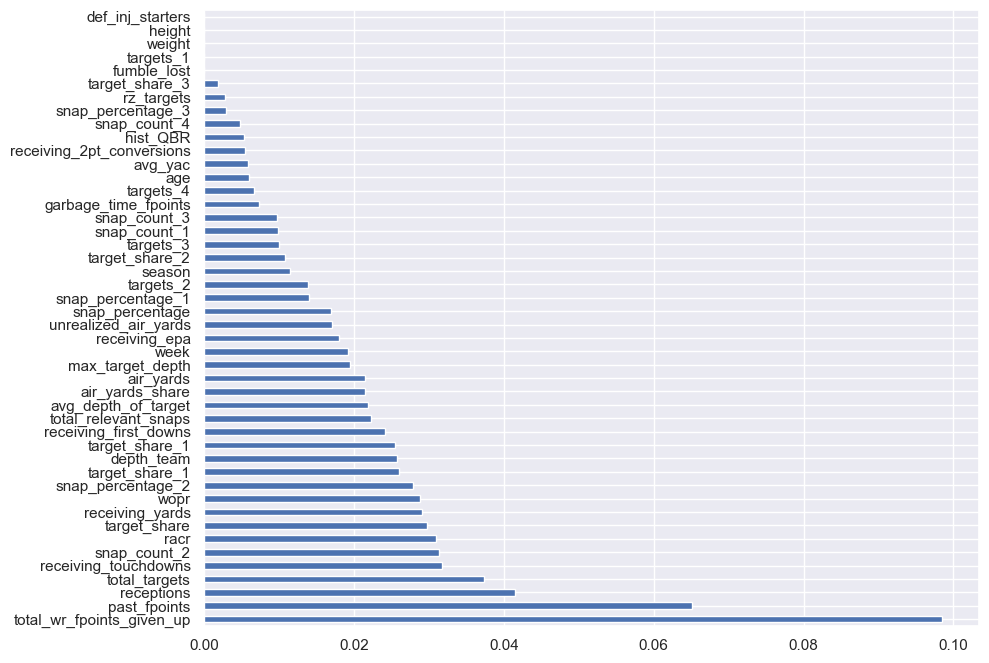

In [73]:
# let's intelligently select features
from sklearn.feature_selection import mutual_info_regression, RFE

importances = mutual_info_regression(X_train_s_all, y_train_s)
feat_importances = pd.Series(importances, feature_list).sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(10,8))
feat_importances.plot(kind='barh', ax=ax)

In [74]:
# RFE
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X_train_s_all, y_train_s)
y_pred = rfe.predict(X_test_s_all)

In [75]:
# get testing scores
print(f"MAE: {mean_absolute_error(y_test_s, y_pred)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 6.128878393077133
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [76]:
feats = []
for idx, rank in enumerate(rfe.ranking_):
    if rank == 1:
        feats.append(feature_list[idx])
        print(feature_list[idx])

feats = sorted(list(set(feats)))
feats

total_wr_fpoints_given_up
depth_team
snap_percentage_2
snap_percentage_3
target_share
air_yards_share
target_share_2
target_share_3
target_share_1
wopr


['air_yards_share',
 'depth_team',
 'snap_percentage_2',
 'snap_percentage_3',
 'target_share',
 'target_share_1',
 'target_share_2',
 'target_share_3',
 'total_wr_fpoints_given_up',
 'wopr']

In [77]:
data4[feats]

air_yards_share  depth_team  snap_percentage_2  snap_percentage_3  \
0            0.054755    0.333333           0.000000           0.000000   
1            0.166114    0.333333           0.000000           0.000000   
2            0.208995    0.333333           0.000000           0.000000   
3            0.123686    0.333333           0.000000           0.000000   
4            0.156347    0.333333           0.000000           0.000000   
...               ...         ...                ...                ...   
6289         0.162994    0.333333           0.622105           0.954545   
6290         0.162946    0.333333           0.542105           0.854545   
6291         0.074301    0.333333           0.480000           0.800000   
6292         0.134725    0.333333           0.455000           0.792857   
6293         0.319090    0.333333           0.320833           0.535714   

      target_share  target_share_1  target_share_2  target_share_3  \
0         0.035152        0.033333        0.065476        0.000000   
1         0.140690        0.144444        0.160173        0.062500   
2         0.177293        0.166667        0.211364        0.100962   
3         0.098270        0.103175        0.104412        0.088462   
4         0.123299        0.100251        0.123162        0.165385   
...            ...             ...             ...             ...   
6289      0.194767        0.154412        0.162500        0.316667   
6290      0.190789        0.196429        0.133333        0.275000   
6291      0.187741        0.250000        0.104762        0.250000   
6292      0.219512        0.241071        0.109890        0.325000   
6293      0.215208        0.216346        0.188462        0.250000   

      total_wr_fpoints_given_up      wopr  
0                         38.70  0.091056  
1                         32.90  0.327314  
2                         45.50  0.412237  
3                         15.65  0.233986  
4                         29.70  0.294392  
...                         ...       ...  
6289                      47.20  0.406247  
6290                      35.30  0.400246  
6291                      39.95  0.333622  
6292                      53.10  0.423576  
6293                      35.15  0.546175  

[6294 rows x 10 columns]

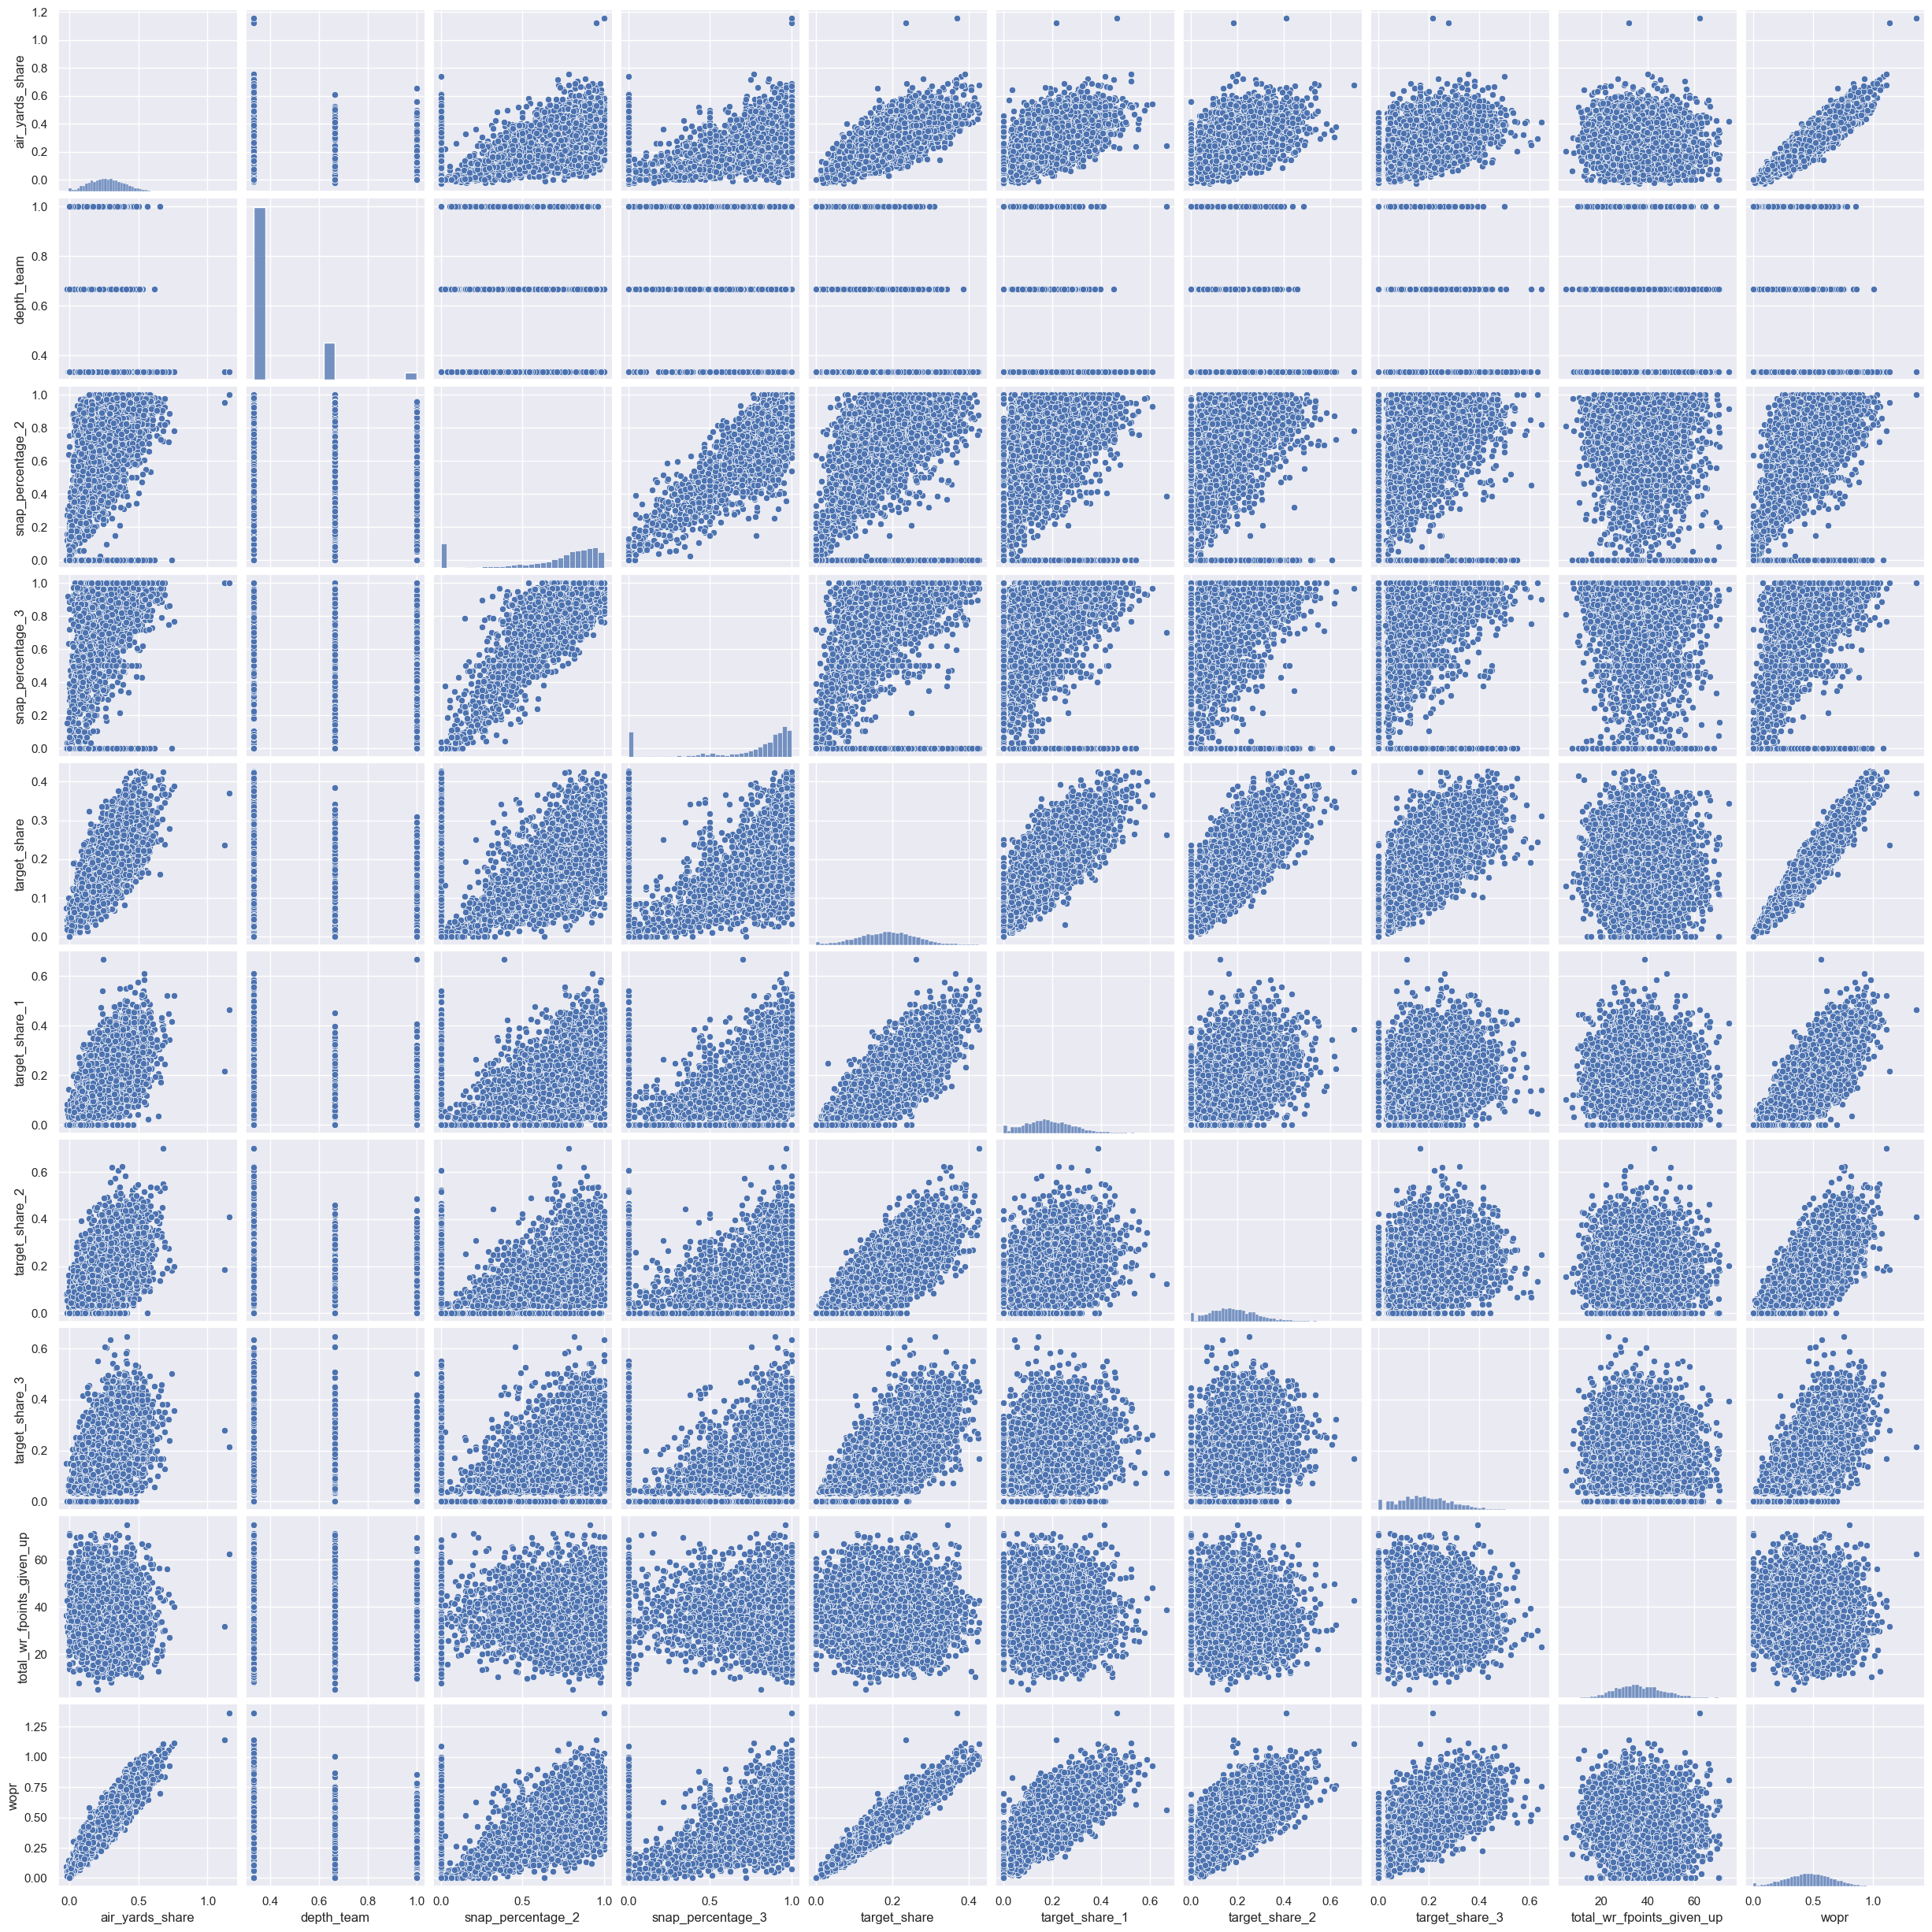

In [78]:
# let's look at the colinearity between these features
# my intuition is that the mutual_info_reg features are better
sns.pairplot(data4[feats])

In [79]:
# intuition confirmed! Snap percentage is highly coorelated with snap_percentage_1, 2 and 3.
# let's go with the first ten features from the first selection
feat_importances.head(10)

total_wr_fpoints_given_up    0.098503
past_fpoints                 0.065155
receptions                   0.041460
total_targets                0.037371
receiving_touchdowns         0.031694
snap_count_2                 0.031293
racr                         0.030891
target_share                 0.029736
receiving_yards              0.029056
wopr                         0.028792
dtype: float64

In [80]:
feature_idx_list = tuple(feature_list.index(x) for x in feat_importances.head(10).index.tolist())
X_train_sub = X_train_s_all[:, feature_idx_list]
cross_val_score(reg, X_train_sub, y_train_s, scoring='neg_mean_absolute_error', cv=3)

array([-5.87523811, -6.00896454, -5.85035177])

In [81]:
# get testing scores
reg.fit(X_train_sub, y_train_s)
y_pred_reg = reg.predict(X_test_s_all[:, feature_idx_list])
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_reg)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 6.086069415023519
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [82]:
# well that's the best so far... what happens when we try polynomial features?
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train_sub)

poly2 = PolynomialFeatures(2, interaction_only = True)
X_test_poly = poly2.fit_transform(X_test_s_all[:, feature_idx_list])

In [83]:
reg.fit(X_train_poly, y_train_s)
y_pred_reg = reg.predict(X_test_poly)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_reg)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 6.014108883585577
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [84]:
# that's not bad! 
# get testing scores
reg.fit(X_train_sub, y_train_s)
y_pred_reg = reg.predict(X_test_s_all[:, feature_idx_list])
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_reg)}, R2: {r2_score(y_test_s, y_pred_reg)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 6.086069415023519, R2: 0.16078521580754512
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [85]:
#let's also try ridge
rd = Ridge()
rd.fit(X_train_sub, y_train_s)
y_pred_rd = rd.predict(X_test_s_all[:, feature_idx_list])
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_rd)}, R2: {r2_score(y_test_s, y_pred_rd)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 6.089701114291285, R2: 0.15961268240954207
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [86]:
ls = Lasso()
ls.fit(X_train_sub, y_train_s)
y_pred_ls = ls.predict(X_test_s_all[:, feature_idx_list])
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_ls)}, R2: {r2_score(y_test_s, y_pred_ls)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

MAE: 6.150521888920712, R2: 0.11851382587527048
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [87]:
# regular regression is fine!
# TODO: Try this again with more data.
# TODO: Add weather data
# TODO: Try a neural network.
reg_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred_reg,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']]) \
    [[
        'receiving_fpoints',
        'yhat',
        'ESPN_projection',
        'player_id', 
         'game_id', 
         'player_name', 
         'receiving_yards', 
         'receptions', 
         'receiving_touchdowns', 
         'week', 
         'fumble_lost'
    ]]
reg_test_results.sort_values(by=['yhat', 'player_id'], ascending = [False, False]).head()

receiving_fpoints       yhat  ESPN_projection   player_id  \
421          32.100000  24.281691        18.529302  00-0036358   
326          17.300001  24.156173        14.444615  00-0035659   
447          14.400000  23.422846        14.215540  00-0036554   
166          25.100000  23.384648        13.957115  00-0033536   
654          29.400000  23.269330        11.022745  00-0038977   

             game_id     player_name  receiving_yards  receptions  \
421  2023_10_NYG_DAL     CeeDee Lamb            151.0        11.0   
326  2023_08_PHI_WAS  Terry McLaurin             63.0         5.0   
447   2023_09_TB_HOU    Nico Collins             54.0         3.0   
166  2023_03_LAC_MIN   Mike Williams            121.0         7.0   
654   2023_09_TB_HOU  Nathaniel Dell            114.0         6.0   

     receiving_touchdowns week  fumble_lost  
421                   1.0   10          0.0  
326                   1.0    8          0.0  
447                   1.0    9          0.0  
166                   1.0    3          0.0  
654                   2.0    9          0.0

In [88]:
reg_test_results.sample(5)

receiving_fpoints       yhat  ESPN_projection   player_id  \
108                6.7  10.890065        16.748786  00-0031588   
218               13.8  15.146799              NaN  00-0034386   
63                21.2  19.173380        15.552606  00-0031381   
174                2.1  11.922376              NaN  00-0033857   
632                1.7   9.766498         7.917689  00-0038544   

             game_id          player_name  receiving_yards  receptions  \
108  2023_11_NYJ_BUF         Stefon Diggs             27.0         4.0   
218    2023_16_LV_KC        Justin Watson             38.0         4.0   
63    2023_11_LV_MIA        Davante Adams             82.0         7.0   
174   2023_13_LAC_NE  JuJu Smith-Schuster             11.0         1.0   
632  2023_12_BAL_LAC     Quentin Johnston              7.0         1.0   

     receiving_touchdowns week  fumble_lost  
108                   0.0   11          0.0  
218                   1.0   16          0.0  
63                    1.0   11          0.0  
174                   0.0   13          0.0  
632                   0.0   12          0.0

In [89]:
# ok, slight improvement over ESPN data. Let's try a neural net
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


In [90]:
def build_and_compile_model():
    model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [91]:
nn = build_and_compile_model()

In [92]:
%%time
history = nn.fit(
        X_train_s_all, 
        y_train_s,
        validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 5.7 s
Wall time: 18.7 s


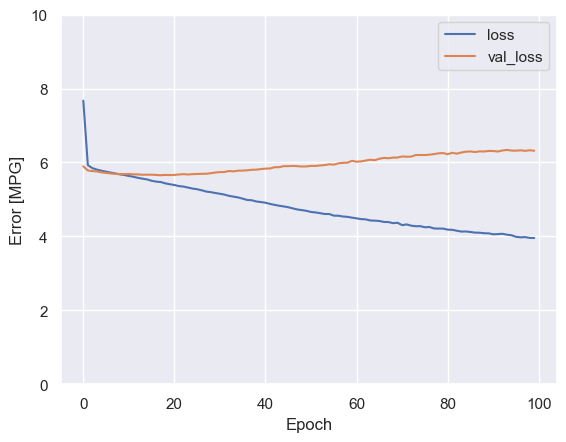

In [93]:
plot_loss(history)

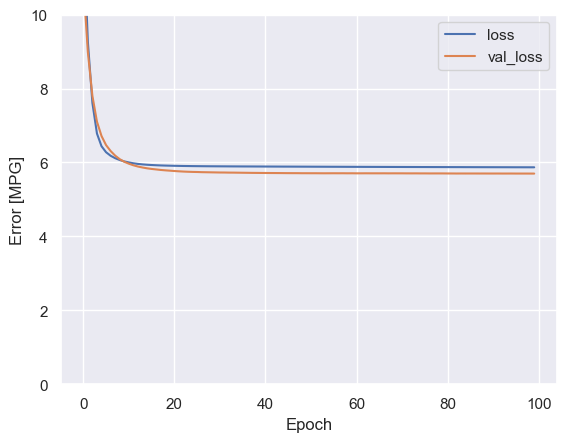

In [94]:
tf.random.set_seed(42)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
hist2 = model.fit( X_train_s_all, y_train_s, epochs = 100, verbose = 0, validation_split=0.2)
plot_loss(hist2)

In [95]:
y_pred_nn = model.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_nn)}, R2: {r2_score(y_test_s, y_pred_nn)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE: 6.091223556173259, R2: 0.14839558535562736
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [96]:
nn_test_results = get_test_results(test_target = y_test, 
                                     preds = y_pred_reg,
                                     id_map = data4[['player_id', 'game_id']], 
                                     init_data = wrs[['player_id', 
                                                     'game_id', 
                                                     'player_name', 
                                                     'receiving_yards', 
                                                     'receptions', 
                                                     'receiving_touchdowns', 
                                                     'week', 
                                                     'fumble_lost',
                                                     'ESPN_projection']]) \
    [[
        'receiving_fpoints',
        'yhat',
        'ESPN_projection',
        'player_id', 
         'game_id', 
         'player_name', 
         'receiving_yards', 
         'receptions', 
         'receiving_touchdowns', 
         'week', 
         'fumble_lost'
    ]].rename({'yhat':'yhat_1LD'},axis=1)
nn_test_results.sort_values(by=['yhat_1LD', 'player_id'], ascending = [False, False]).head()

receiving_fpoints   yhat_1LD  ESPN_projection   player_id  \
421          32.100000  24.281691        18.529302  00-0036358   
326          17.300001  24.156173        14.444615  00-0035659   
447          14.400000  23.422846        14.215540  00-0036554   
166          25.100000  23.384648        13.957115  00-0033536   
654          29.400000  23.269330        11.022745  00-0038977   

             game_id     player_name  receiving_yards  receptions  \
421  2023_10_NYG_DAL     CeeDee Lamb            151.0        11.0   
326  2023_08_PHI_WAS  Terry McLaurin             63.0         5.0   
447   2023_09_TB_HOU    Nico Collins             54.0         3.0   
166  2023_03_LAC_MIN   Mike Williams            121.0         7.0   
654   2023_09_TB_HOU  Nathaniel Dell            114.0         6.0   

     receiving_touchdowns week  fumble_lost  
421                   1.0   10          0.0  
326                   1.0    8          0.0  
447                   1.0    9          0.0  
166                   1.0    3          0.0  
654                   2.0    9          0.0

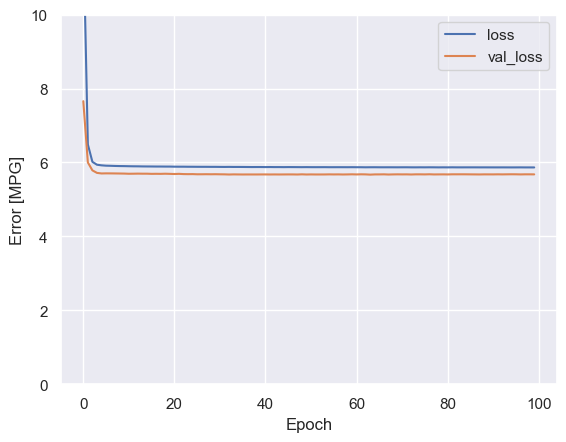

In [97]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
hist2 = model2.fit( X_train_s_all, y_train_s, epochs = 100, verbose = 0, validation_split=0.2)
plot_loss(hist2)

In [98]:
y_pred_nn2 = model2.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_nn2)}, R2: {r2_score(y_test_s, y_pred_nn2)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 6.153345918244329, R2: 0.13441937373539614
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


In [99]:
nn_test_results["yhat_2LD"] = y_pred_nn2


In [100]:
nn_test_results[["receiving_fpoints", "yhat_1LD", "yhat_2LD", "ESPN_projection"]]

receiving_fpoints   yhat_1LD   yhat_2LD  ESPN_projection
0                 17.4   8.530510  14.226063              NaN
1                 31.5  21.440879  20.421129         9.703639
2                 14.6  22.309965  18.481461        13.125377
3                 27.7  18.222916  15.169694        14.109426
4                 28.5  14.511237  12.195740        15.753747
..                 ...        ...        ...              ...
720                5.6  18.279716  19.688608        10.208909
721               10.7  14.669575  16.159281        12.169346
722               17.2  16.965460  18.414099        13.681500
723               26.9  20.379138  21.939711        11.834278
724               15.2  12.156728  13.853337        12.587575

[725 rows x 4 columns]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 6.113492493382815, R2: 0.14675126844973896
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


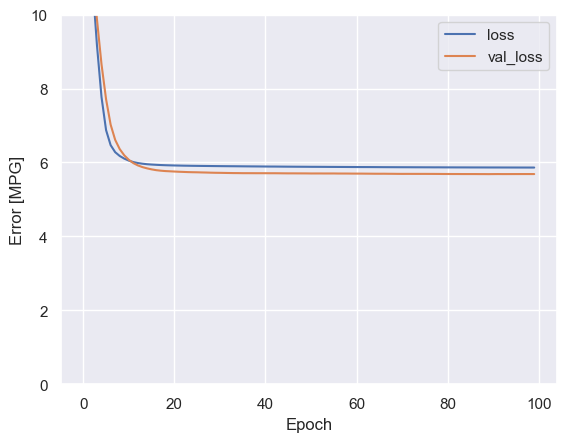

In [101]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model3.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(), #stochastic GD
              metrics = ['mae'])
hist3 = model3.fit( X_train_s_all, y_train_s, epochs = 100, verbose = 0, validation_split=0.2)
y_pred_nn3 = model3.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_nn3)}, R2: {r2_score(y_test_s, y_pred_nn3)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")
plot_loss(hist3)

In [102]:
nn_test_results["yhat_2LD_Adam"] = y_pred_nn3

In [103]:
nn_test_results[['receiving_fpoints'] + [x for x in nn_test_results.columns if 'yhat' in x] + [x for x in nn_test_results.columns if 'yhat' not in x and 'fpoints' not in x]]

receiving_fpoints   yhat_1LD   yhat_2LD  yhat_2LD_Adam  ESPN_projection  \
0                 17.4   8.530510  14.226063      14.135329              NaN   
1                 31.5  21.440879  20.421129      20.019356         9.703639   
2                 14.6  22.309965  18.481461      18.006119        13.125377   
3                 27.7  18.222916  15.169694      14.792893        14.109426   
4                 28.5  14.511237  12.195740      12.573153        15.753747   
..                 ...        ...        ...            ...              ...   
720                5.6  18.279716  19.688608      19.212570        10.208909   
721               10.7  14.669575  16.159281      16.112549        12.169346   
722               17.2  16.965460  18.414099      18.148289        13.681500   
723               26.9  20.379138  21.939711      21.477251        11.834278   
724               15.2  12.156728  13.853337      14.021605        12.587575   

      player_id          game_id   player_name  receiving_yards  receptions  \
0    00-0027944  2023_17_ARI_PHI   Julio Jones             34.0         2.0   
1    00-0030035  2023_03_CAR_SEA  Adam Thielen            145.0        11.0   
2    00-0030035  2023_04_MIN_CAR  Adam Thielen             76.0         7.0   
3    00-0030035  2023_05_CAR_DET  Adam Thielen            107.0        11.0   
4    00-0030035  2023_06_CAR_MIA  Adam Thielen            115.0        11.0   
..          ...              ...           ...              ...         ...   
720  00-0039146    2023_13_KC_GB   Jayden Reed             16.0         4.0   
721  00-0039146   2023_14_GB_NYG   Jayden Reed             27.0         8.0   
722  00-0039146    2023_15_TB_GB   Jayden Reed             52.0         6.0   
723  00-0039146   2023_17_GB_MIN   Jayden Reed             89.0         6.0   
724  00-0039146   2023_18_CHI_GB   Jayden Reed            112.0         4.0   

     receiving_touchdowns week  fumble_lost  
0                     2.0   17          0.0  
1                     1.0    3          0.0  
2                     0.0    4          0.0  
3                     1.0    5          0.0  
4                     1.0    6          0.0  
..                    ...  ...          ...  
720                   0.0   13          0.0  
721                   0.0   14          0.0  
722                   1.0   15          0.0  
723                   2.0   17          0.0  
724                   0.0   18          0.0  

[725 rows x 13 columns]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 6.1775637176941185, R2: 0.12846205842549285
ESPN MAE: 6.420987544124975. 81.79% of records have ESPN projections.


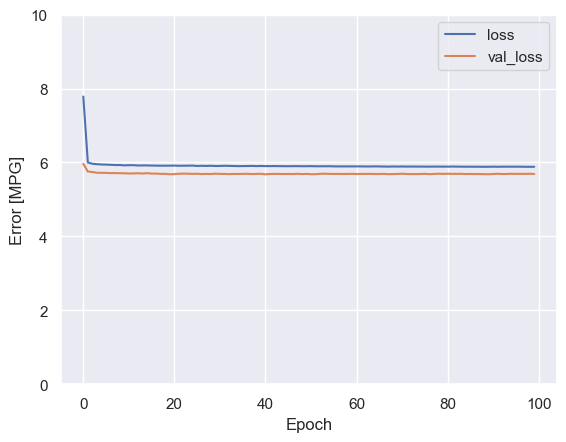

In [104]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
model4.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(), #stochastic GD
              metrics = ['mae'])
hist4 = model4.fit( X_train_s_all, y_train_s, epochs = 100, verbose = 0, validation_split=0.2)
y_pred_nn4 = model4.predict(X_test_s_all)
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_nn4)}, R2: {r2_score(y_test_s, y_pred_nn4)}")
print(f"ESPN MAE: {mean_absolute_error(y_espn, yhat_espn)}. {perc_filled_espn:.2%} of records have ESPN projections.")
plot_loss(hist4)

In [105]:
nn_test_results["yhat_3LD_Adam"] = y_pred_nn4
nn_test_results[['receiving_fpoints'] + [x for x in nn_test_results.columns if 'yhat' in x] + [x for x in nn_test_results.columns if 'yhat' not in x and 'fpoints' not in x]]

receiving_fpoints   yhat_1LD   yhat_2LD  yhat_2LD_Adam  yhat_3LD_Adam  \
0                 17.4   8.530510  14.226063      14.135329      14.516759   
1                 31.5  21.440879  20.421129      20.019356      20.484480   
2                 14.6  22.309965  18.481461      18.006119      17.851694   
3                 27.7  18.222916  15.169694      14.792893      14.741569   
4                 28.5  14.511237  12.195740      12.573153      11.482945   
..                 ...        ...        ...            ...            ...   
720                5.6  18.279716  19.688608      19.212570      20.180527   
721               10.7  14.669575  16.159281      16.112549      16.561293   
722               17.2  16.965460  18.414099      18.148289      18.631420   
723               26.9  20.379138  21.939711      21.477251      21.928047   
724               15.2  12.156728  13.853337      14.021605      13.935508   

     ESPN_projection   player_id          game_id   player_name  \
0                NaN  00-0027944  2023_17_ARI_PHI   Julio Jones   
1           9.703639  00-0030035  2023_03_CAR_SEA  Adam Thielen   
2          13.125377  00-0030035  2023_04_MIN_CAR  Adam Thielen   
3          14.109426  00-0030035  2023_05_CAR_DET  Adam Thielen   
4          15.753747  00-0030035  2023_06_CAR_MIA  Adam Thielen   
..               ...         ...              ...           ...   
720        10.208909  00-0039146    2023_13_KC_GB   Jayden Reed   
721        12.169346  00-0039146   2023_14_GB_NYG   Jayden Reed   
722        13.681500  00-0039146    2023_15_TB_GB   Jayden Reed   
723        11.834278  00-0039146   2023_17_GB_MIN   Jayden Reed   
724        12.587575  00-0039146   2023_18_CHI_GB   Jayden Reed   

     receiving_yards  receptions  receiving_touchdowns week  fumble_lost  
0               34.0         2.0                   2.0   17          0.0  
1              145.0        11.0                   1.0    3          0.0  
2               76.0         7.0                   0.0    4          0.0  
3              107.0        11.0                   1.0    5          0.0  
4              115.0        11.0                   1.0    6          0.0  
..               ...         ...                   ...  ...          ...  
720             16.0         4.0                   0.0   13          0.0  
721             27.0         8.0                   0.0   14          0.0  
722             52.0         6.0                   1.0   15          0.0  
723             89.0         6.0                   2.0   17          0.0  
724            112.0         4.0                   0.0   18          0.0  

[725 rows x 14 columns]

<img src='./Screenshot 2024-06-30 231058.png'>

In [106]:
# what would this model have predicted for my wrs for week 10?
nn_test_results[(nn_test_results["week"] == 10) & \
                (nn_test_results["player_name"].isin(["Stefon Diggs", "Brandon Aiyuk", "DeMario Douglas"]))]
# no demario, but my model did WAY better than ESPN! 

receiving_fpoints   yhat_1LD  ESPN_projection   player_id  \
107                6.4  10.625996        20.827173  00-0031588   
393               14.5  14.938276        15.291962  00-0036261   

             game_id    player_name  receiving_yards  receptions  \
107  2023_10_DEN_BUF   Stefon Diggs             34.0         3.0   
393   2023_10_SF_JAX  Brandon Aiyuk             55.0         3.0   

     receiving_touchdowns week  fumble_lost   yhat_2LD  yhat_2LD_Adam  \
107                   0.0   10          0.0   9.674844        9.92088   
393                   1.0   10          0.0  15.100459       15.94844   

     yhat_3LD_Adam  
107       9.683593  
393      15.405246

In [325]:
# it really seems like the limit of this dataset is around 5.8 MAE. Most models are getting the same error
# we added data and it made the predictions worse, which meant we were overfitting the model
# The last thing to do would be to add features, and feature engineer (PCA). 
# we could also change the model paradigm and make it a time series. 

# for now I should probably focus on getting RB's TE's and QB's (DEF and K too possibly)
# clean up notebooks and pipelines, etc.